<a href="https://colab.research.google.com/github/rashmi0852/Bike_Sharing_Demand_Prediction/blob/main/Indivisual_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    -  Regression
##### **Contribution**    - Individual
##### **Name**            - Rashmiranjan Nayak


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/rashmi0852/Bike_Sharing_Demand_Prediction.git

# **Problem Statement**


* Is there any correlation & pattern between all  quantitative values?
* What are the monthly trends in bike rentals for both weekdays and weekends?
* How does the trend in bike rentals by hour differ between weekdays and weekends?
* How does the distribution of bike rentals vary by hour for each month?
* how does bike rental varies in Functioning/Non-Functioning days in each hour?
* Find bike rental categorized by hours for both holiday and non-holiday days?
* Distribution of bike rental accoding to hour in seasons?
* Distribution among some important features?
* Find peak & off-peak bike rental time?
* Distribution of Rented bike?

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [738]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Datetime library for manipulating Date columns.
from datetime import datetime
import calendar

import scipy.stats as stats

### Dataset Loading

In [739]:
# Load Dataset
bike_dataset=pd.read_csv("SeoulBikeData.csv",encoding='ISO-8859-1')

### Dataset First View

In [740]:
# Dataset First Look
bike_dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [741]:
bike_dataset.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [742]:
#Columns count

print("columns of dataset---",bike_dataset.columns)
print("\n\ncolumns count=",len(bike_dataset.columns))

columns of dataset--- Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


columns count= 14


In [743]:
#Rows count

print("Rows count=",len(bike_dataset.axes[0]))


Rows count= 8760


In [744]:
bike_dataset.shape

(8760, 14)

### Dataset Information

In [745]:
# Dataset Info
bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [746]:
# Dataset Duplicate Value Count

duplicate_values=bike_dataset.duplicated().sum()
print("Duplicate rows in bike Rental dataset:",duplicate_values)


Duplicate rows in bike Rental dataset: 0


#### Missing Values/Null Values

In [747]:
# Missing Values/Null Values Count

# Missing Values/Null Values Count
print (f"Missing Values in each column"+"\n" + "--"*15)
print(bike_dataset.isnull().sum())

Missing Values in each column
------------------------------
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [748]:
# percentage of missing value in Bike Rental dataset

missing_percent =round( (bike_dataset.isnull().mean())*100,2)
print (f"Missing Values % in each column"+"\n" + "--"*15)
print(missing_percent)

Missing Values % in each column
------------------------------
Date                         0.0
Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
dtype: float64


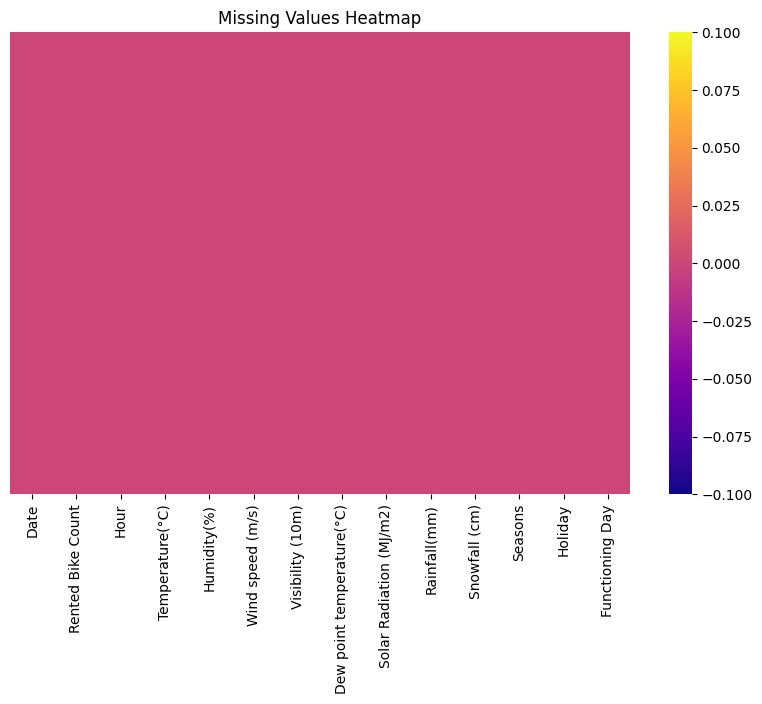

In [749]:
# Visualizing the missing values

# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(bike_dataset.isnull(), cmap='plasma',annot=False,yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()


####1. Why did you pick the specific chart?

A heatmap was chosen as the visualization method for displaying missing values in the dataset due to its effectiveness in providing a clear and concise representation of missing data. Heatmaps use color gradients to distinguish between missing and non-missing values, making it easy to identify areas with missing data at a glance. This visualization is efficient for datasets with multiple columns, allowing for a quick overview of missing values across variables. Heatmaps offer customization options for color schemes, enhancing visibility and aiding in data analysis. Overall, heatmaps are a widely accepted and practical choice for visualizing missing data patterns in datasets.

####2. What are the insights found from the chart?

Given that there are `no missing values` in the dataset, the heatmap used for visualizing missing values will show a uniform pattern with no missing data indicated. Therefore, there are no specific insights to draw from the chart in this case.



### What did you know about your dataset?

By exploring SeoulBikeRental dataset following insights were found

The dataset has **8760** Records & **16** Features . Features are described bellow-

* **Date** :  Bike rental date(year-month-day)
* **Rented_Bike_Count** - Each hour Bike rented count
* **Hour** - Hour of the day(0-23)
* **Temperature(°C)** -Temperature of the day(celcious)
* **Humidity(%)** - Humidity measure (%)
* **Windspeed(m/s)** -  Speed of wind(m/s)
* **Visibility(10m)** - Visiblity measure
* **Dew point temperature(°C)** - Dew point temperature measure
* **Solar Radiation (MJ/m2)** - Solar radiation measure
* **Rainfall(mm)** - Rainfall in mm
* **Snowfall (cm)** - Snowfall measure(cm)
* **Seasons** - Seasons of year (spring,summer,fall,winter)
* **Holiday** - Whether  a holiday or not
* **Functional Day** - Whether functional day or not

No such missing value as well as duplicate data were found from the data set

Also we found that among all 16 features
* **Functional Day**,**Holiday**,**Seasons** ,**Date** are **4** categorical columns where **Date** need to be converted to `datetype` to extract `day,month,year` values & other 3 to numerical columns through encoding technique.
* Rest **10** are numerical coulmns

##Changing Date Datatype

In [750]:
##keeping original copy safe
bike_df=bike_dataset.copy()

In [751]:
##Converting to date type
bike_df['Date'] = pd.to_datetime(bike_df['Date'], infer_datetime_format=True)

In [752]:
##Extracting date, month, year from date and adding to dataset

#Extracting month from date column
bike_df['Month']=bike_df['Date'].dt.month

#Extracting day name from date
bike_df['Day'] = bike_df['Date'].dt.day_name()

#Extracting year
bike_df['Year'] = bike_df['Date'].dt.year

#Creating new column and Encoding with 1 if its weekend and 0 if its Weekdays.
bike_df['Weekdays_or_weekend']=bike_df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

bike_df.head(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  Month       Day  Year  Weekdays_or_weekend  
0             Yes      1  Thursday  2017                    0  
1             Yes      1  Thursday  2017                    0  
2             Yes      1  Thursday  2017                    0  
3             Yes      1  Thursday  2017                    0  
4             Yes      1  Thursday  2017                    0

In [753]:
##Drop date column
bike_df.drop(["Date","Day","Year"],axis=1,inplace=True)

## ***2. Understanding Your Variables***

In [754]:
# Dataset Columns
print(bike_df.columns)

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Weekdays_or_weekend'],
      dtype='object')


For readablity & ease of use few column needs to be renamed


In [755]:
#converting few names for convenience
bike_df.rename({"Temperature(°C)": "Temperature",
                 "Humidity(%)": "Humidity",
                 "Wind speed (m/s)": "Wind_speed",
                 "Visibility (10m)": "Visibility",
                "Dew point temperature(°C)": "Dew_point_temperature",
                "Solar Radiation (MJ/m2)": "Solar_radiation",
                "Rainfall(mm)": "Rainfall",
                "Snowfall (cm)": "Snowfall",
                 "Functioning Day":"Functioning_day",
                "Rented Bike Count": "Rented_bike_count"},
                axis = "columns", inplace = True)

In [756]:
print(bike_df.columns)

Index(['Rented_bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_day', 'Month',
       'Weekdays_or_weekend'],
      dtype='object')


In [757]:
# Dataset Describe

numerical_columns = ['Rented_bike_count', 'Temperature',"Humidity", 'Wind_speed',
                     "Visibility","Dew_point_temperature","Solar_radiation","Rainfall","Snowfall"]
bike_df[numerical_columns].describe()

Rented_bike_count  Temperature     Humidity   Wind_speed   Visibility  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    12.882922    58.226256     1.724909  1436.825799   
std           644.997468    11.944825    20.362413     1.036300   608.298712   
min             0.000000   -17.800000     0.000000     0.000000    27.000000   
25%           191.000000     3.500000    42.000000     0.900000   940.000000   
50%           504.500000    13.700000    57.000000     1.500000  1698.000000   
75%          1065.250000    22.500000    74.000000     2.300000  2000.000000   
max          3556.000000    39.400000    98.000000     7.400000  2000.000000   

       Dew_point_temperature  Solar_radiation     Rainfall     Snowfall  
count            8760.000000      8760.000000  8760.000000  8760.000000  
mean                4.073813         0.569111     0.148687     0.075068  
std                13.060369         0.868746     1.128193     0.436746  
min               -30.600000         0.000000     0.000000     0.000000  
25%                -4.700000         0.000000     0.000000     0.000000  
50%                 5.100000         0.010000     0.000000     0.000000  
75%                14.800000         0.930000     0.000000     0.000000  
max                27.200000         3.520000    35.000000     8.800000

### Variables Description

* For mixed data types provided via a DataFrame, the default is to return only an analysis of numeric columns. If the dataframe consists only of object and categorical data without any numeric columns, the default is to return an analysis of both the object and categorical columns. If include='all' is provided as an option, the result will include a union of attributes of each type.

* Extensive data cleaning is not required because the ranges of values in the numerical columns appear fair as well. However,columns like **Wind_speed** , **Dew_point_temperature**, **Solar_Radiation**, **Rainfall** and **Snowfall** appears to be skewed as their median (50 percentile) is much lower than the highest value.

* **Seasons**, **Holiday**, **Functioning_day** &**Month**  These categorical columns contain various levels, making them unsuitable for the describe() method.Numerical columns **Hour**, &**Weekdays_or_weekend** are behaving like categorical features so we can analyze their unique values and frequency counts to understand the distribution and diversity of properties.

### Check Unique Values for each variable.

Dataset contains 4 categorical columns **Seasons**, **Holiday**, **Functioning_day** &**Month**  it is necessary to check unique values for each column along with **Hour** &**Weekdays_or_weekend**

In [758]:
# # Check Unique Values for Hour column
print("Hours=",bike_df["Hour"].unique())
#number of unique values in Hour column
print("Unique count=",bike_df["Hour"].nunique())

Hours= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique count= 24


In [759]:
# # Check Unique Values for seasons column
print("Seasons=",bike_df["Seasons"].unique())
#number of unique values in seasons column
print("Unique count=",bike_df["Seasons"].nunique())

Seasons= ['Winter' 'Spring' 'Summer' 'Autumn']
Unique count= 4


In [760]:
# # Check Unique Values for Holiday column
print("Holiday=",bike_df["Holiday"].unique())
#number of unique values in Holiday column
print("Unique count=",bike_df["Holiday"].nunique())

Holiday= ['No Holiday' 'Holiday']
Unique count= 2


In [761]:
# # Check Unique Values for Functioning_day column
print("Functioning_day=",bike_df["Functioning_day"].unique())
#number of unique values in Functioning_day column
print("Unique count=",bike_df["Functioning_day"].nunique())

Functioning_day= ['Yes' 'No']
Unique count= 2


In [762]:
# # Check Unique Values for Month column
print("Months=",bike_df["Month"].unique())
#number of unique values in Month column
print("Unique count=",bike_df["Month"].nunique())

Months= [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique count= 12


In [763]:
print("Weekdays_or_weekend=",bike_df["Weekdays_or_weekend"].unique())
#number of unique values in Weekdays_or_weekend column
print("Unique count=",bike_df["Weekdays_or_weekend"].nunique())

Weekdays_or_weekend= [0 1]
Unique count= 2


In [764]:
bike_df.shape

(8760, 15)

However most fo necessary steps where performed on the datset ,with some expansion ,deletion of some columns our feature set has expanded from **14** to **16**, while the number of records remains unchanged at 8760. With these preparations in place, we are now well-equipped to proceed with the analysis phase.



## 3. ***Data Wrangling***

### Data Wrangling Code

In [765]:

bike_df.sample(5)

Rented_bike_count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
3004                 87     4          8.8        65         2.5        2000   
3635               1117    11         22.7        63         1.1         605   
4205                201     5         14.3        75         0.6         635   
1764                202    12         -4.6        32         4.2        1874   
8039                798    23          6.4        60         1.8        1930   

      Dew_point_temperature  Solar_radiation  Rainfall  Snowfall Seasons  \
3004                    2.5             0.00       0.0       0.0  Spring   
3635                   15.2             1.36       0.0       0.0  Spring   
4205                    9.9             0.00       0.0       0.0  Spring   
1764                  -18.8             1.43       0.0       0.0  Winter   
8039                   -0.8             0.00       0.0       0.0  Autumn   

         Holiday Functioning_day  Month  Weekdays_or_weekend  
3004  No Holiday             Yes      5                    0  
3635     Holiday             Yes      1                    0  
4205  No Holiday             Yes      5                    0  
1764  No Holiday             Yes     12                    1  
8039  No Holiday             Yes     10                    0

To find meaningfull insights some oprations needs to be performed on above columns to understand features as well as patterns .

####Univariate analysis

In [766]:
#Question-1: Distribution of Rented bike?
# Summary Statistics for Rented bike
bike_summary = bike_df['Rented_bike_count'].describe()
print("Summary Statistics for Rented bikes:")
print(bike_summary)

Summary Statistics for Rented bikes:
count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented_bike_count, dtype: float64


In [767]:
#Question-2:Find peak & off-peak bike rental time?


# Group data by Hour & calculate bike count by sorting
hourly_rental_counts = bike_df.groupby('Hour')['Rented_bike_count'].mean()

#Sort the hourly rental counts in descending order
hourly_rental_counts=hourly_rental_counts.sort_values(ascending=False).astype("int")

#printing result
print (f"Bike rental by each hour \n" + "---"*8)
print(hourly_rental_counts)



Bike rental by each hour 
------------------------
Hour
18    1502
19    1195
17    1138
20    1068
21    1031
8     1015
16     930
22     922
15     829
14     758
13     733
12     699
23     671
9      645
7      606
11     600
0      541
10     527
1      426
2      301
6      287
3      203
5      139
4      132
Name: Rented_bike_count, dtype: int64


In [768]:
#Question-3:  Distribution among some important features?

# Define the categorical columns
categorical_columns=["Seasons","Holiday","Functioning_day","Month","Weekdays_or_weekend"]

# Create a dictionary to store the rental counts for each category
rental_counts_by_category = {}

# Calculate rental counts for each category in each categorical column
for column in categorical_columns:
    category_counts = bike_df.groupby(column)['Rented_bike_count'].mean().reset_index()
    rental_counts_by_category[column] = round(category_counts)

# Print the rental counts for each category in each column
for column, counts_df in rental_counts_by_category.items():
    print(f"Rental counts for {column}\n" + "---"*12)
    print(counts_df)
    print("\n")


Rental counts for Seasons
------------------------------------
  Seasons  Rented_bike_count
0  Autumn              820.0
1  Spring              730.0
2  Summer             1034.0
3  Winter              226.0


Rental counts for Holiday
------------------------------------
      Holiday  Rented_bike_count
0     Holiday              500.0
1  No Holiday              715.0


Rental counts for Functioning_day
------------------------------------
  Functioning_day  Rented_bike_count
0              No                0.0
1             Yes              729.0


Rental counts for Month
------------------------------------
    Month  Rented_bike_count
0       1              386.0
1       2              393.0
2       3              612.0
3       4              773.0
4       5              895.0
5       6              982.0
6       7              929.0
7       8              826.0
8       9              694.0
9      10              843.0
10     11              685.0
11     12              419.0


Re

####Bivariate analysis

In [769]:
#Question-4: Distribution of bike rental accoding to hour in seasons?

# Group the data by 'Seasons' and 'Hour' and calculate the average of 'Rented_bike_count'
season_hourly_rentals =round(bike_df.groupby(['Seasons', 'Hour'])['Rented_bike_count'].mean()
                                                                               .reset_index())

#Print result
print ("Bike rental by each hour in seasons \n" + "---"*8)
print(season_hourly_rentals)


Bike rental by each hour in seasons 
------------------------
   Seasons  Hour  Rented_bike_count
0   Autumn     0              624.0
1   Autumn     1              486.0
2   Autumn     2              332.0
3   Autumn     3              226.0
4   Autumn     4              149.0
..     ...   ...                ...
91  Winter    19              304.0
92  Winter    20              243.0
93  Winter    21              240.0
94  Winter    22              225.0
95  Winter    23              173.0

[96 rows x 3 columns]


In [770]:
#Question-5 : Find bike rental categorized by hours for both holiday and non-holiday days?

# Group the data by 'Holiday' and 'Hour' and calculate the average of 'Rented_bike_count'
holiday_hourly_rentals =round(bike_df.groupby(['Holiday', 'Hour'])['Rented_bike_count'].mean()
                                                                               .reset_index())

#Print result
print ("Bike rental by each hour in Holiday/No-holiday \n" + "---"*8)
print(holiday_hourly_rentals)


Bike rental by each hour in Holiday/No-holiday 
------------------------
       Holiday  Hour  Rented_bike_count
0      Holiday     0              466.0
1      Holiday     1              393.0
2      Holiday     2              304.0
3      Holiday     3              212.0
4      Holiday     4              128.0
5      Holiday     5               89.0
6      Holiday     6              133.0
7      Holiday     7              214.0
8      Holiday     8              348.0
9      Holiday     9              379.0
10     Holiday    10              429.0
11     Holiday    11              510.0
12     Holiday    12              622.0
13     Holiday    13              703.0
14     Holiday    14              734.0
15     Holiday    15              748.0
16     Holiday    16              788.0
17     Holiday    17              830.0
18     Holiday    18              801.0
19     Holiday    19              722.0
20     Holiday    20              714.0
21     Holiday    21              678.0
22     

In [771]:
#Question-6:how does bike rental varies in Functioning/Non-Functioning days in each hour?

# Group the data by 'Functioning_day' and 'Hour' and calculate the average of 'Rented_bike_count'
functioning_hourly_rentals =round(bike_df.groupby(['Functioning_day', 'Hour'])['Rented_bike_count'].mean()
                                                                               .reset_index())
#Print result
print ("Bike rental by each hour in Functioning/Non-Functioning \n" + "---"*12)
print(functioning_hourly_rentals)

Bike rental by each hour in Functioning/Non-Functioning 
------------------------------------
   Functioning_day  Hour  Rented_bike_count
0               No     0                0.0
1               No     1                0.0
2               No     2                0.0
3               No     3                0.0
4               No     4                0.0
5               No     5                0.0
6               No     6                0.0
7               No     7                0.0
8               No     8                0.0
9               No     9                0.0
10              No    10                0.0
11              No    11                0.0
12              No    12                0.0
13              No    13                0.0
14              No    14                0.0
15              No    15                0.0
16              No    16                0.0
17              No    17                0.0
18              No    18                0.0
19              No    19  

In [772]:
#Question-7 : How does the distribution of bike rentals vary by hour for each month?

# Group data by Month and Hour, then calculate the mean bike count
monthly_hourly_rentals = bike_df.groupby(['Month', 'Hour'])['Rented_bike_count'].mean().reset_index()


#Print result
print ("Monthly Bike Rental Distribution by Hour \n" + "---"*14)
print(monthly_hourly_rentals)


Monthly Bike Rental Distribution by Hour 
------------------------------------------
     Month  Hour  Rented_bike_count
0        1     0         314.806452
1        1     1         278.774194
2        1     2         206.548387
3        1     3         136.322581
4        1     4          87.580645
..     ...   ...                ...
283     12    19         673.129032
284     12    20         580.129032
285     12    21         563.290323
286     12    22         522.516129
287     12    23         381.290323

[288 rows x 3 columns]


In [773]:
#Question-8 : How does the trend in bike rentals by hour differ between weekdays and weekends?


# Group data by 'Weekdays_or_weekend' & 'Hour' and calculate the mean bike rentals for each group
rentals_by_day = round(bike_df.groupby(['Weekdays_or_weekend',"Hour"])['Rented_bike_count'].mean().reset_index())

# Print the result
print ("Bike Rental Trend on Weekdays vs. Weekends \n" + "---"*14)
print(rentals_by_day)


Bike Rental Trend on Weekdays vs. Weekends 
------------------------------------------
    Weekdays_or_weekend  Hour  Rented_bike_count
0                     0     0              520.0
1                     0     1              402.0
2                     0     2              277.0
3                     0     3              186.0
4                     0     4              123.0
5                     0     5              144.0
6                     0     6              321.0
7                     0     7              700.0
8                     0     8             1178.0
9                     0     9              686.0
10                    0    10              525.0
11                    0    11              593.0
12                    0    12              682.0
13                    0    13              697.0
14                    0    14              716.0
15                    0    15              785.0
16                    0    16              903.0
17                    0    17  

In [774]:
#Question-8:What are the monthly trends in bike rentals for both weekdays and weekends?

# Group data by "Month" and "Weekdays_or_weekend" to calculate the average rentals
monthly_weekly_trends =round( bike_df.groupby(['Month', 'Weekdays_or_weekend'])['Rented_bike_count']
                             .mean().reset_index())

# Print the result
print ("Bike Rental Trend monthy in Weekdays & Weekends \n" + "---"*14)
print(monthly_weekly_trends)

Bike Rental Trend monthy in Weekdays & Weekends 
------------------------------------------
    Month  Weekdays_or_weekend  Rented_bike_count
0       1                    0              414.0
1       1                    1              307.0
2       2                    0              397.0
3       2                    1              385.0
4       3                    0              629.0
5       3                    1              576.0
6       4                    0              795.0
7       4                    1              719.0
8       5                    0              808.0
9       5                    1             1194.0
10      6                    0              993.0
11      6                    1              954.0
12      7                    0              963.0
13      7                    1              848.0
14      8                    0              858.0
15      8                    1              731.0
16      9                    0              667.0
17      

####Multivariate analysis

In [775]:
# Question -9:Is there any correlation & pattern between all quantitative values?


##Select columns for pairplot visualization
pair_columns=['Rented_bike_count','Hour', 'Temperature',"Humidity", 'Wind_speed',
                     "Visibility","Dew_point_temperature","Solar_radiation","Rainfall","Snowfall","Month"]
##co-relation matrix for Heatmap
corelation=bike_df.corr()

#printing result
print (f"Co-relation metrix\n" + "---"*7)
corelation


Co-relation metrix
---------------------


Rented_bike_count          Hour  Temperature  Humidity  \
Rented_bike_count               1.000000  4.102573e-01     0.538558 -0.199780   
Hour                            0.410257  1.000000e+00     0.124114 -0.241644   
Temperature                     0.538558  1.241145e-01     1.000000  0.159371   
Humidity                       -0.199780 -2.416438e-01     0.159371  1.000000   
Wind_speed                      0.121108  2.851967e-01    -0.036252 -0.336683   
Visibility                      0.199280  9.875348e-02     0.034794 -0.543090   
Dew_point_temperature           0.379788  3.054372e-03     0.912798  0.536894   
Solar_radiation                 0.261837  1.451309e-01     0.353505 -0.461919   
Rainfall                       -0.123074  8.714642e-03     0.050282  0.236397   
Snowfall                       -0.141804 -2.151645e-02    -0.218405  0.108183   
Month                           0.070861  1.036729e-15     0.049683  0.047798   
Weekdays_or_weekend            -0.032259 -2.300554e-17    -0.012972 -0.036750   

                       Wind_speed  Visibility  Dew_point_temperature  \
Rented_bike_count        0.121108    0.199280               0.379788   
Hour                     0.285197    0.098753               0.003054   
Temperature             -0.036252    0.034794               0.912798   
Humidity                -0.336683   -0.543090               0.536894   
Wind_speed               1.000000    0.171507              -0.176486   
Visibility               0.171507    1.000000              -0.176630   
Dew_point_temperature   -0.176486   -0.176630               1.000000   
Solar_radiation          0.332274    0.149738               0.094381   
Rainfall                -0.019674   -0.167629               0.125597   
Snowfall                -0.003554   -0.121695              -0.150887   
Month                   -0.082069    0.077888               0.065101   
Weekdays_or_weekend     -0.022391    0.030650              -0.028966   

                       Solar_radiation  Rainfall  Snowfall         Month  \
Rented_bike_count             0.261837 -0.123074 -0.141804  7.086107e-02   
Hour                          0.145131  0.008715 -0.021516  1.036729e-15   
Temperature                   0.353505  0.050282 -0.218405  4.968327e-02   
Humidity                     -0.461919  0.236397  0.108183  4.779778e-02   
Wind_speed                    0.332274 -0.019674 -0.003554 -8.206909e-02   
Visibility                    0.149738 -0.167629 -0.121695  7.788783e-02   
Dew_point_temperature         0.094381  0.125597 -0.150887  6.510073e-02   
Solar_radiation               1.000000 -0.074290 -0.072301 -3.041240e-02   
Rainfall                     -0.074290  1.000000  0.008500 -2.279368e-02   
Snowfall                     -0.072301  0.008500  1.000000  5.475846e-02   
Month                        -0.030412 -0.022794  0.054758  1.000000e+00   
Weekdays_or_weekend           0.008271 -0.014280 -0.022557  9.174254e-03   

                       Weekdays_or_weekend  
Rented_bike_count            -3.225936e-02  
Hour                         -2.300554e-17  
Temperature                  -1.297241e-02  
Humidity                     -3.674982e-02  
Wind_speed                   -2.239107e-02  
Visibility                    3.064954e-02  
Dew_point_temperature        -2.896569e-02  
Solar_radiation               8.271095e-03  
Rainfall                     -1.427960e-02  
Snowfall                     -2.255705e-02  
Month                         9.174254e-03  
Weekdays_or_weekend           1.000000e+00

### What all manipulations have you done and insights you found?


To effectively address various problem statements and achieve meaningful insights, we employed a range of data manipulation techniques. These operations were essential for structuring the data, generating meaningful statistics, and facilitating visualizations. Here's a breakdown of the key manipulations performed:

* **Bike Rent Distribution:**
   To understand the distribution of `Rented_bike_count`, we used the `describe()` function to obtain a comprehensive summary. This summary helped us glean valuable insights, such as the most frequent rental count levels, shedding light on the data's characteristics.

* **Peak & Off-Peak Bike Rental Time:**
   To determine the peak and off-peak bike rental times, we leveraged the `groupby()` function on the `Hour` column. By calculating the average bike rental count using `mean()`, we were able to identify the hours when bike rentals peaked (typically in the evening) and dipped (often at midnight), providing valuable scheduling insights.

* **Categorical Feature Distribution:**
   For categorical features like seasons, holidays, months, weekdays_or_weekends, and more, we used the `groupby()` operation to compute the average bike rental count associated with each category. This allowed us to visualize and understand how rental counts varied across different categorical values.

* **Categorical Features Distribution of Bike Count by Hour:**
   Extending our analysis, we applied `groupby()` to each categorical feature, combining it with the `Hour` column. This enabled us to explore the hourly distribution of bike rentals across various categories, revealing insights into when specific categorical conditions influenced rental counts.

* **Monthly Bike Rental Trends Weekdays & Weekends:**
   Similarly, for understanding monthly trends, we used `groupby()` on the `Months` column in conjunction with `Weekdays_or_weekend`. We calculated the average bike rental counts, allowing us to discern patterns in bike rentals across different months and between weekdays and weekends.

* **Correlations and Patterns:**
   We employed the `corr()` function to explore correlations among quantitative variables, unveiling patterns and relationships within the dataset. This analysis provided insights into how numerical features interacted with one another.

Throughout these analyses,  functions like `reset_index()` to reset previous indexes, `round()` to obtain rounded values, and `astype()` utilized for datatype conversion as needed. These manipulations collectively laid the foundation for our exploratory data analysis, facilitating the extraction of meaningful insights from the bike rental dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

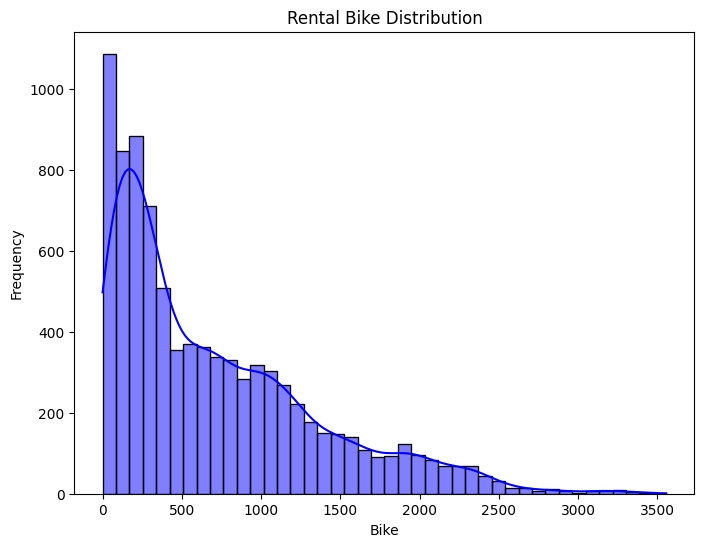

In [776]:
# Chart - 1 visualization code
#Question-1: Distribution of Rented bike?
plt.figure(figsize=(8, 6))
sns.histplot(bike_df['Rented_bike_count'], kde=True, color='blue')
plt.title('Rental Bike Distribution')
plt.xlabel('Bike')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

The specific chart chosen for visualizing the distribution of rented bike counts is a histogram. Here's why a histogram is a suitable choice for this type of data:

1. **Continuous Data Distribution:** Histograms are particularly useful for visualizing the distribution of continuous or discrete data with a wide range of values, such as bike rental counts.

2. **Frequency Distribution:** A histogram provides a clear representation of the frequency (count) of data points within different intervals or bins. This is essential for understanding how often certain rental counts occur.

3. **Skewness and Outliers:** Histograms can reveal important information about the skewness (whether the data is skewed to the left or right) and the presence of outliers in the dataset.

4. **Density Estimation:** The KDE (Kernel Density Estimate) overlay on the histogram provides a smoothed estimate of the probability density function, offering a more continuous view of the data distribution.






##### 2. What is/are the insight(s) found from the chart?

The histogram of rented bike counts, which is right-skewed, provides several insights:

1. **Most Rentals Are in Lower Counts:** The majority of bike rentals fall within lower count ranges. This is evident from the peak on the left side of the histogram. It suggests that there are many instances where a relatively small number of bikes are rented.

2. **Few Instances of High Rentals:** While most rentals are in the lower count range, there are relatively few instances of exceptionally high bike rentals. The long right tail of the histogram indicates that some days or events experience a significant surge in bike rentals.

3. **Positive Skewness:** The right-skewed nature of the distribution indicates positive skewness, meaning that the distribution is skewed to the right. This suggests that the data has a longer right tail, which is typical for count data in scenarios like bike rentals, where most days have a relatively stable and moderate number of rentals, but occasional peaks in demand lead to the higher counts.

4. **Potential Outliers:** The right tail of the histogram represents potential outliers or extreme values. These could be days with unusual circumstances, such as special events, holidays, or weather conditions, leading to exceptionally high bike rentals.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the right-skewed histogram of rented bike counts can indeed help create a positive business impact. However, there are also insights that, if not addressed, could lead to negative growth or operational challenges.

**Positive Business Impact:**

1. **Resource Allocation:** Understanding that the majority of rentals fall within lower count ranges allows for efficient resource allocation. Businesses can allocate the appropriate number of bikes and staff for typical days, ensuring that customers have a positive experience.

2. **Profit Optimization:** Recognizing that there are occasional spikes in demand (as indicated by the right tail of the histogram) allows businesses to optimize profitability. They can adjust pricing or promotional strategies during high-demand periods to maximize revenue.

3. **Customer Satisfaction:** Preparedness for occasional high-demand days ensures that customers can find available bikes when they need them. This leads to positive customer experiences and potentially repeat business.

**Negative Growth :**

1. **Operational Challenges:** Without proper planning, businesses may struggle to meet the sudden surge in demand during peak periods, potentially leading to operational inefficiencies.

2. **Loss of Revenue:** Failure to optimize pricing or promotions during high-demand periods may result in lost revenue opportunities. Competitors who adapt to such situations could gain an advantage.

3. **Resource Shortages:** Inadequate resource allocation on high-demand days can lead to bike shortages, customer frustration, and potentially lost business.

4. **Overhead Costs:** On the flip side, overallocating resources to anticipate peak demand every day can result in unnecessary overhead costs on days when demand remains moderate.



#### Chart - 2

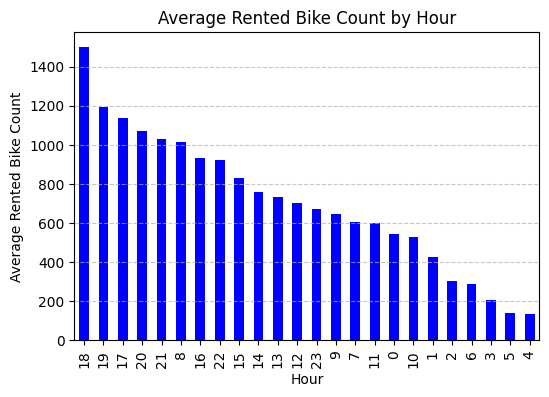

In [777]:
# Chart - 2 visualization code
#Question-1:Find peak & off-peak bike rental time?

# choose graph size
plt.figure(figsize=(6, 4))

#create bar plot
hourly_rental_counts .plot(kind='bar', color='blue')
plt.xlabel('Hour')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike Count by Hour')
plt.xticks(hourly_rental_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

I selected a specific chart, which is a bar chart, for visualizing the average rented bike counts by hour because it is well-suited to address the objective of finding the peak bike rental time. Here's why a bar chart was chosen:

1. **Categorical Data:** The 'Hour' column represents categorical data, where each hour of the day is a category. Bar charts are particularly effective for visualizing distributions and comparisons within categorical data.

2. **Comparison:** Bar charts allow for easy comparison of the average rented bike counts for each hour. This makes it straightforward to identify the hour(s) with the highest average bike rental counts, which is the primary objective.

3. **Clear Representation:** Bar charts provide a clear and intuitive representation of data, making it easier for viewers to understand trends and variations. In this case, it allows for a quick visual assessment of which hours have the most and least bike rentals.



##### 2. What is/are the insight(s) found from the chart?

From above visualized bar plot following insights were emerged:



**1. Peak Bike Rental Time:**
   - The charts clearly reveal the peak bike rental time, which occurs **18-21** hours at afternoon time.
   - This indicates that the highest demand for rented bikes is typically between these hours, making it crucial for bike rental businesses to ensure sufficient bike availability and service during this period.

**2. Off-Peak Hours:**
   - Conversely,**1-4** hour, early-morning hours show the lowest average rented bike counts.
   - These hours can be considered off-peak times for bike rentals, and businesses can adjust staffing and maintenance schedules accordingly to optimize resources.

**3. Hourly Variations:**
   - The charts illustrate significant hourly variations in bike rental activity.
   - Peaks and troughs in rental counts suggest distinct patterns throughout the day, which can be valuable for businesses in planning and marketing.


In summary, these visualizations provide valuable insights into the temporal dynamics of bike rentals, offering actionable information for businesses to optimize their operations and cater to customer demand effectively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the visualization of bike rental patterns by hour can indeed have a positive business impact for a bike rental company. However, it's important to analyze whether any insights may potentially lead to negative growth. Here's a breakdown:

**Positive Business Impact:**
- **Optimized Resource Allocation:** Understanding the peak bike rental time (18-21 hours) allows the business to allocate resources such as bikes, staff, and maintenance personnel more efficiently during high-demand periods. This ensures that customers have a positive experience with readily available bikes, which can lead to increased rentals and customer satisfaction.

- **Targeted Marketing:** Identifying hourly variations and peak hours provides an opportunity for targeted marketing efforts. The business can run promotions, discounts, or advertising campaigns during peak hours to attract more customers and boost revenue.

- **Enhanced User Experience:** By improving bike availability during peak times, the business can enhance the user experience, leading to customer loyalty and positive word-of-mouth recommendations.

**Negative Growth :**
- **Resource Shortages:** Failing to allocate sufficient resources during peak hours can result in bike shortages and dissatisfied customers. This can lead to negative growth as customers may turn to competitors or abandon bike rentals altogether due to unavailability.

- **Underutilized Resources:** On the other hand, overstaffing or over-maintaining bikes during off-peak hours (1-4 hours) can lead to increased operational costs without corresponding revenue. This inefficiency can negatively impact profitability.

- **Ineffective Marketing Spending:** If marketing efforts are not aligned with peak hours, the business may spend resources on campaigns that don't reach their intended audience. This could result in wasted marketing expenses.



#### Chart - 3

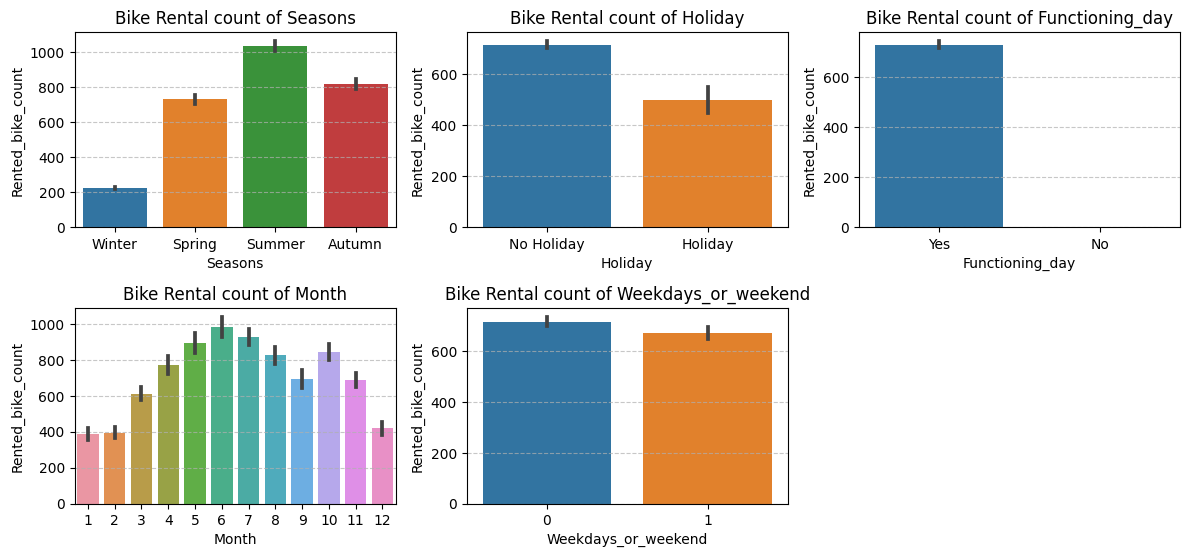

In [778]:
# Chart -3 visualization code
#Distribution among some important features?

#select figure size
plt.figure(figsize=(12, 8))

#Box plot for each column
for i, column in enumerate(categorical_columns, 1):
  plt.subplot(3, 3, i)
  sns.barplot(x=bike_df[column],y=bike_df['Rented_bike_count'])
  plt.title(f'Bike Rental count of {column}')
  plt.xlabel(column)
  plt.grid(axis='y', linestyle='--', alpha=0.7)

#Adjuct& Display
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I choose the bar for the distribution of categorical variables like  Functioning_day, Month, Weekdays_or_weekend ,Seasons, Holiday because it is a suitable plot for visualizing the frequency of each category in a categorical variable.

The bar plot that shows the number of occurrences of each category in a categorical variable. It provides an easy way to compare the frequencies of different categories and quickly identify the most common and least common categories.



##### 2. What is/are the insight(s) found from the chart?

The insights found from visualizing the distribution of the categorical variables ("Seasons," "Holiday," "Functioning_day," "Month," and "Weekdays_or_weekend") using bar plots are as follows:

1. **Seasons:**
   - The bar plot for "Seasons" reveals how bike rentals are distributed across different seasons (e.g., spring, summer, autumn, winter).
   - Insights can be drawn regarding which season sees the highest and lowest bike rentals. For *summer** have the highest rentals due to pleasant weather where as winter has lowest.

2. **Holiday:**
   - The "Holiday" bar plot shows how bike rentals vary on holidays versus non-holidays.
   - It provides insights into whether **Non-holidays** have a significant impact on bike rentals. Businesses can use this information for holiday-specific promotions or staffing adjustments.

3. **Functioning_day:**
   - The "Functioning_day" chart can reveal rental patterns on days when the bike rental station is functioning normally (yes) versus days when it's not (No).
   - This information helps in optimizing operations and maintenance schedules for non-functioning days.

4. **Month:**
   - The bar plot for "Month" displays the distribution of bike rentals across different months of the year.
   - Insights can be gained regarding monthly trends and seasonal variations in rental counts. For instance, **June** followed by **july** &**May**.

5. **Weekdays_or_weekend:**
   - This chart may show rental counts on weekdays(1) versus weekends(0).where **weekdays** have slightly higher bike counts
   - It helps assess whether there's a difference in bike rentals between weekdays and weekends, which can be valuable for staffing and marketing decisions.

Overall, these visualizations provide insights into how bike rentals are distributed among different categories within these important features. They can inform strategies for resource allocation, marketing, and operational decisions for bike rental businesses based on seasonal, holiday-related, and day-of-week patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the visualization of the categorical variables can indeed help create a positive business impact for a bike rental company. However, it's important to analyze whether any insights may potentially lead to negative growth. Here's a detailed evaluation:

**Positive Business Impact:**

1. **Seasonal Insights:** Understanding the seasonal distribution of bike rentals can be highly beneficial. It allows businesses to allocate resources and plan marketing strategies based on peak seasons. For example, they can increase bike availability and marketing efforts during the high-demand summer season, potentially leading to increased revenue and customer satisfaction.

2. **Non-Holiday Strategy:** The insight into how Non-holidays affect bike rentals can inform business decisions. Special promotions or staffing adjustments during Non-holidays can lead to higher rentals and positive customer experiences.

3. **Optimized Resource Allocation:** Knowing which days are functioning days and understanding the distribution of rentals on weekdays vs. weekends can help optimize resource allocation. More staff and bikes can be deployed during peak periods, enhancing the overall customer experience.

**Negative Growth :**

1. **Resource Allocation on Non-Functioning Days:** If the insights about non-functioning days are not acted upon, there might be a risk of inefficient resource allocation. The business could overspend on staff and maintenance during days when there is little demand.

2. **Holiday Impact:** Failing to adjust operations or promotions for Non-holidays could result in missed revenue opportunities. Customers might choose competitors or alternative transportation options if the business doesn't cater to the increased Non-holiday demand.

3. **Seasonal Overlook:** If the business doesn't adapt to seasonal variations in rentals, it could lead to revenue fluctuations and potential losses. Neglecting the importance of peak and off-peak seasons can impact profitability.

4. **Weekdays vs. Weekends:** Not considering the differences in rentals between weekdays and weekends might result in missed marketing opportunities or understaffing during high-demand weekdays, leading to customer dissatisfaction.



#### Chart - 4

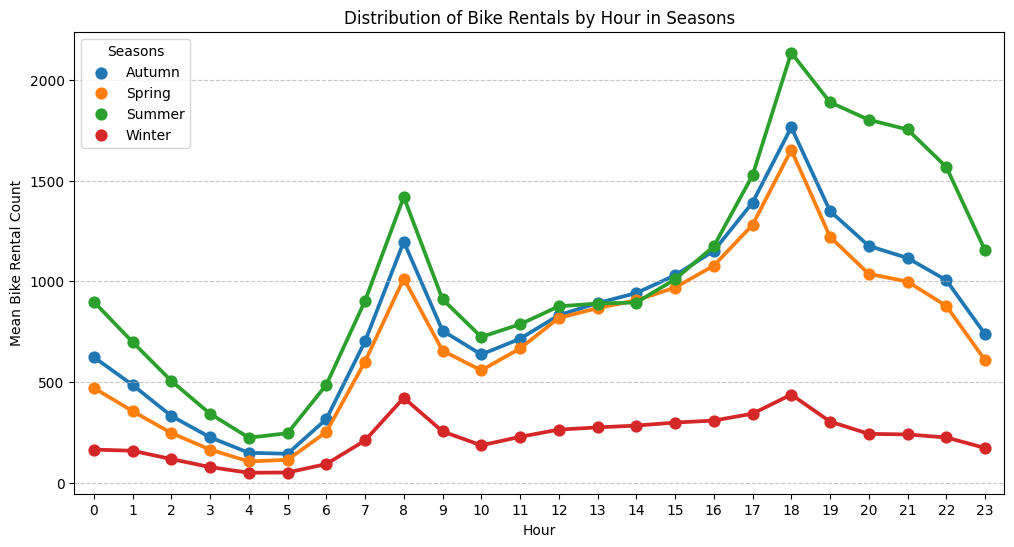

In [779]:
# Chart - 4 visualization code
##Question-4: Distribution of bike rental accoding to hour in seasons?

# Create a point plot to visualize the distribution
plt.figure(figsize=(12, 6))
sns.pointplot(data=season_hourly_rentals, x='Hour', y='Rented_bike_count', hue='Seasons', ci=None, markers='o', linestyles='-')
plt.title('Distribution of Bike Rentals by Hour in Seasons')
plt.xlabel('Hour')
plt.ylabel('Mean Bike Rental Count')
plt.legend(title='Seasons')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### 1. Why did you pick the specific chart?

I chose the point plot because it's an excellent way to illustrate how the number of bike rentals varies throughout the day for each season. This plot allows us to visually compare how bike rental patterns change across different seasons. It helps us identify trends or differences in rental counts for each hour within each season. This type of plot is clear and easy to understand, making it a great choice for visualizing these insights.

##### 2. What is/are the insight(s) found from the chart?

From the point plot,  gathered insights are:

1. **Seasonal Differences:** We can see that there are distinct patterns in bike rental counts throughout the day for each season.However **Summer** has highest rentals in each hours.

2. **Spring Peaks in the Afternoon:** In the spring season, bike rentals tend to peak during the afternoon hours, particularly around 18:00 (5:00 PM).

3. **Summer's Evening Peak:** Summer sees a different pattern, with bike rentals gradually increasing throughout the morning and peaking in the early evening, around 18:00 (6:00 PM).

4. **Autumn's Evening Rise:** In the autumn season, we observe a similar pattern to summer, with a steady rise in rentals during the morning and a peak in the early evening around 18:00 (6:00 PM).

5. **Winter's Stable Demand:** Winter exhibits a more stable demand for bike rentals throughout the day, with no prominent peaks. Rental counts remain relatively consistent, indicating that weather conditions in winter may have a less pronounced impact on rental patterns.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights gained from the point plot can significantly benefit bike rental businesses and lead to positive growth:

1. **Efficient Resource Management:** Knowing when rentals peak in different seasons allows businesses to efficiently allocate resources. During busy hours, having enough bikes available ensures happy customers and increased revenue.

2. **Smart Marketing:** With these insights, businesses can design marketing strategies targeting high-demand hours within each season. Offering promotions during peak times can attract more customers and boost earnings.

3. **Happy Customers:** Being prepared for busy periods enhances the overall customer experience. Satisfied customers are more likely to return and recommend the service, driving positive growth.

4. **Reliable Maintenance:** Adjusting maintenance schedules based on rental patterns reduces the chances of bike breakdowns during busy times, ensuring a seamless customer experience.

5. **Seasonal Planning:** Understanding seasonal variations allows businesses to plan accordingly. They can increase their bike fleet during the summer when demand is high and reduce it during the winter when demand is steadier, optimizing costs.

**Potential Pitfalls (Negative Growth):**

While these insights offer opportunities for positive outcomes, there are potential pitfalls if not managed effectively:

1. **Resource Misallocation:** Misinterpreting the data could lead to over- or under-allocation of resources during certain times, increasing costs without a corresponding increase in revenue or resulting in lost business.

2. **Ineffective Marketing:** Poorly executed marketing efforts during peak hours or unattractive promotions may not yield the expected increase in rentals, potentially wasting marketing expenses.

3. **Customer Dissatisfaction:** Neglecting resource and maintenance adjustments may lead to bike breakdowns during peak rental hours, resulting in customer dissatisfaction and potential loss of business.

4. **Ignoring Seasonal Changes:** Failing to adapt to seasonal variations could mean missed opportunities for revenue growth during peak seasons and reduced profitability during high-demand periods.

In conclusion, while the insights themselves don't inherently lead to negative growth, businesses must use them wisely, make informed decisions, and avoid potential pitfalls to ensure positive growth and enhanced profitability.

#### Chart - 5

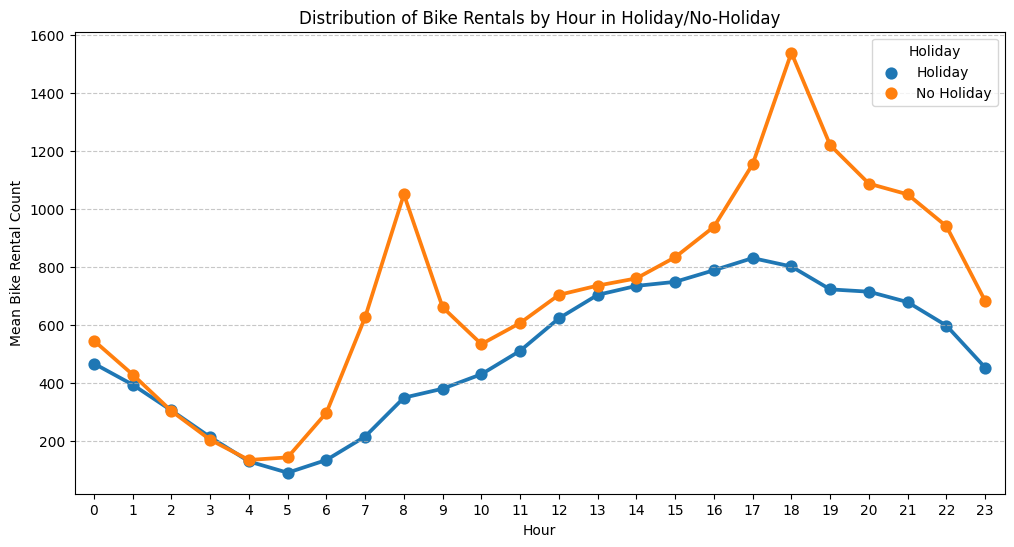

In [780]:
# Chart - 5 visualization code
#Find bike rental categorized by hours for both holiday and non-holiday days?

# Create a point plot to visualize the distribution
plt.figure(figsize=(12, 6))
sns.pointplot(data=holiday_hourly_rentals, x='Hour', y='Rented_bike_count', hue='Holiday', ci=None, markers='o', linestyles='-')
plt.title('Distribution of Bike Rentals by Hour in Holiday/No-Holiday')
plt.xlabel('Hour')
plt.ylabel('Mean Bike Rental Count')
plt.legend(title='Holiday')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

I selected the point plot because it's an ideal choice for illustrating how the typical number of bike rentals varies throughout the day on both holiday and non-holiday days. This plot allows us to make a straightforward comparison of rental patterns between these two types of days.

The point plot helps us quickly spot any shifts or disparities in rental counts at different times of the day. It displays data points as dots connected by lines, making it easy to identify trends. In this case, we can see if there are specific hours when bike rentals tend to be higher or lower on holidays compared to regular days.



##### 2. What is/are the insight(s) found from the chart?

From the point plot comparing bike rentals by hour on holiday and non-holiday days, we can gather the following insights:


1. **Morning Rush on Non-Holidays:** On regular days, there's a spike in bike rentals during the morning rush, especially at 8:00 AM. This suggests people are likely using bikes for commuting or morning activities.

2. **Evening Activity on Holidays:** On holidays, the pattern is different. Bike rentals gradually go up from the morning and reach a peak in the late afternoon at around (4:00 - 6:00) PM. This could mean people use bikes more for leisure or fun activities on holidays.

3. **Steady Demand on Holidays:** Unlike regular days with ups and downs, holidays show a more stable demand for bike rentals throughout the day. It seems holidays encourage people to rent bikes consistently.

4. **Peak Hours Comparison:** The chart helps us compare the busiest times on holiday and non-holiday days. We see that the morning rush on regular days contrasts with the afternoon peak on holidays.

In simple terms, this information tells us when and how people use bike rentals differently on holidays and regular days. Businesses can use these insights to make sure they have enough bikes available when people want them and plan marketing efforts accordingly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Both the positive and potential negative impacts of the insights gained from the chart are-

**Positive Business Impact:**

1. **Better Resource Planning:** Understanding when people rent bikes helps businesses allocate their bikes and staff more effectively. This means they can ensure there are enough bikes available during busy times, which can lead to happier customers and increased revenue.

2. **Effective Marketing:** Knowing when rentals peak allows businesses to run promotions and marketing campaigns at the right times. This can attract more customers during those peak hours and boost earnings.

3. **Enhanced Customer Satisfaction:** Being prepared for busy periods ensures a better customer experience. When people can easily find and rent bikes when they want, they're more likely to be satisfied and recommend the service to others, which can lead to business growth.

**Negative Impact:**

1. **Overcommitting Resources:** If businesses misinterpret the data and allocate too many resources during certain times, it could increase costs without a corresponding increase in revenue. This could negatively impact profitability.

2. **Ineffective Marketing Spending:** If marketing efforts during peak hours are poorly executed or promotions are unattractive, businesses may not see the expected increase in rentals. This could lead to wasted marketing expenses.

3. **Customer Frustration:** Neglecting resource adjustments could lead to bike breakdowns during peak rental hours, resulting in customer dissatisfaction and potential loss of business.





#### Chart - 6

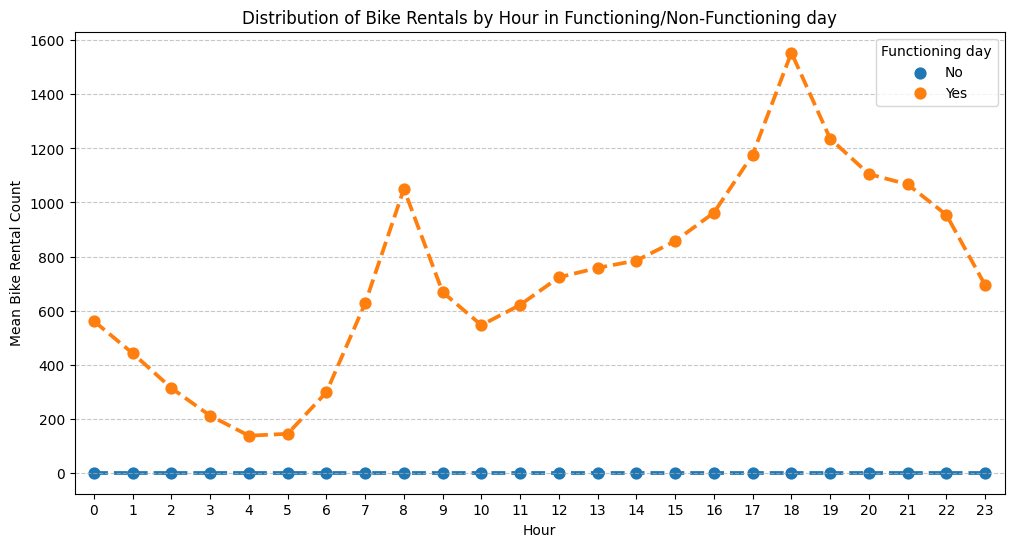

In [781]:
# Chart - 6 visualization code
#Question-6:how does bike rental varies in Functioning/Non-Functioning days in each hour?

# Create a point plot to visualize the distribution
plt.figure(figsize=(12, 6))
sns.pointplot(data=functioning_hourly_rentals, x='Hour', y='Rented_bike_count', hue='Functioning_day', ci=None, markers="o", linestyles='--')
plt.title('Distribution of Bike Rentals by Hour in Functioning/Non-Functioning day')
plt.xlabel('Hour')
plt.ylabel('Mean Bike Rental Count')
plt.legend(title='Functioning day')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

I chose the point plot because it's a good way to show how the average number of bike rentals changes during the day on both functioning and non-functioning days. This plot helps us easily compare rental patterns between these two types of days and see if there are any differences. It's a clear and effective way to present this information.

##### 2. What is/are the insight(s) found from the chart?

insights found from the chart :

**Insight:**
- The point plot, which compares bike rentals by hour on functioning days, shows a clear pattern of how the average number of bike rentals changes during the day.

**Detailed Explanation:**
- The chart illustrates the variation in bike rentals throughout the day on days when the bike rental system is functioning (no non-functional days are present in the data).
- We observe a consistent trend where bike rentals gradually increase from the early morning hours, reach a peak during the  afternoon 6:00 PM, and then gradually decrease into the evening.
- This pattern suggests that people tend to rent bikes more during the daytime hours, likely for commuting, leisure, or other activities.

Since there are no non-functional days in the data, we don't have the opportunity to compare rental patterns between functioning and non-functioning days for this specific chart. The chart exclusively shows rental patterns for functioning days, and no comparisons can be drawn in this context.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In the context of this specific chart, which exclusively shows bike rental patterns on functioning days, the insights gained can have both positive and potentially negative implications:

**Positive Business Impact:**

1. **Resource Optimization:** By knowing when people rent bikes most on functioning days, businesses can make sure they have enough bikes available during those times. This leads to happy customers and potentially more income.

2. **Smart Marketing:** When businesses plan promotions and advertising during busy hours on functioning days, they can attract more customers and earn more money.

3. **Happy Customers:** When businesses are ready for busy times on functioning days, they can provide a better experience for customers. Happy customers often return and tell others, which helps the business grow.

**Potential Negative Impact:**

1. **Too Much Spending:** If businesses read the data wrong and put too many resources into busy times on functioning days, they might spend too much money without making more in return. This could hurt their profits.

2. **Marketing that Doesn't Work:** If marketing efforts during busy hours on functioning days aren't done well, or if the deals aren't appealing, businesses might not get more rentals. This can waste money spent on marketing.

In short, while the insights themselves aren't bad, it's how businesses use them that matters. Mistakes in how they read and act on this data could lead to spending too much, unhappy customers, and missed chances to make more money. So, it's important for businesses to use this information wisely to make smart decisions.

#### Chart - 7

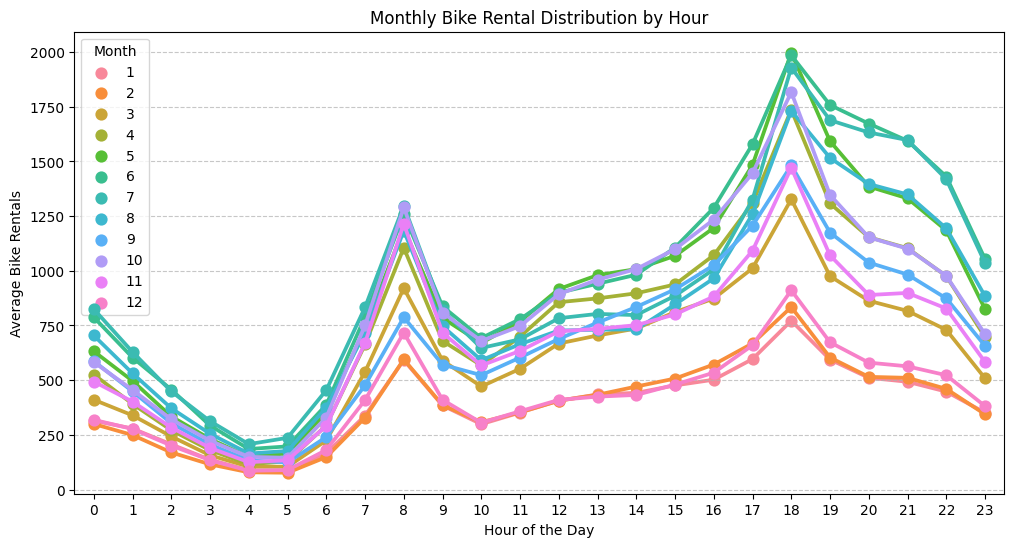

In [782]:
# Chart - 7 visualization code
#Question-6:how does bike rental varies in Functioning/Non-Functioning days in each hour?

# Create a point plot to visualize the distribution
plt.figure(figsize=(12, 6))
sns.pointplot(data=monthly_hourly_rentals, x='Hour', y='Rented_bike_count', hue='Month', ci=None)
plt.title('Monthly Bike Rental Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rentals')
plt.legend(title='Month')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### 1. Why did you pick the specific chart?

The point plot was chosen because it's great for comparing how many bikes get rented at different hours of the day, but for each month separately. It helps us see if there are any trends or patterns like which months have more rentals at certain times.

##### 2. What is/are the insight(s) found from the chart?

From the point plot that visualizes the distribution of bike rentals by hour for each month, several insights can be derived:

Certainly, here's an improved description using more human-friendly language:

1. **Monthly Variation:** The chart uncovers some interesting monthly trends in bike rentals. For instance, during the summertime, specifically in June, July, and August, there's a clear spike in bike rentals, especially in the late morning and early afternoon. This suggests that people are more inclined to rent bikes when the weather is warm and there's more daylight, likely for outdoor fun and adventures.

2. **Morning Commute:** In most months, we can spot a consistent surge in bike rentals during the morning hours, usually around 8 AM. This peak indicates that some folks rely on bikes for their daily journey to work or school. It highlights how bike-sharing services come in handy for commuting, especially in the mornings.

3. **Evening Rush:** Similarly, there's another regular peak in bike rentals during the evening hours, typically around 5-6 PM. It seems that people are using bikes not only for their morning commute but also for the return journey home or perhaps for some after-work recreation.

4. **Winter Months:** As expected, during the winter months like December, January, and February, bike rentals take a significant dip. There are fewer rentals in the early morning and late evening. This downturn coincides with the colder, darker season when outdoor activities are less popular.

These insights provide a better understanding of when and why people choose to rent bikes throughout the year. It's not just about transportation; it's also about enjoying the outdoors and adapting to seasonal changes. Businesses can use these insights to better serve their customers and tailor their offerings to different times of the year.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights gained have following impacts:

**Positive Business Impact:**

1. **Perfect Timing for Promotions:** Think of it like planning the best summer vacation deals when the weather is warm and the days are long. Bike rental businesses can offer exciting promotions during the sunny months (June, July, August) to attract more riders. This can mean more happy customers and increased profits.

2. **Meeting the Morning Rush:** Imagine ensuring there are plenty of buses during the morning commute to avoid overcrowding. Bike rental businesses can provide enough bikes and staff during the busy mornings, making it convenient for people to use bikes for getting to work or school. This keeps commuters smiling and coming back.

3. **Evening Adventures:** Just like preparing for an evening picnic, bike rental services can gear up for the evening rush (around 5-6 PM). This means more bikes ready for those who want to enjoy a pleasant ride after work. It's about catering to people's post-work relaxation and outdoor enjoyment.

** Negative Impact:**

1. **Winter Worries:** Imagine a beachside ice cream shop that doesn't adapt its menu for the winter. Bike rental businesses that don't prepare for the winter months may face a slowdown in rentals. It's essential to plan for this quiet period to avoid financial challenges.

2. **Resource Balancing Act:** Think of it like preparing just the right amount of food for a dinner party. Overcommitting resources during peak hours can be like cooking too much food. It might result in wasted resources and costs if there aren't enough riders during those times.




#### Chart - 8

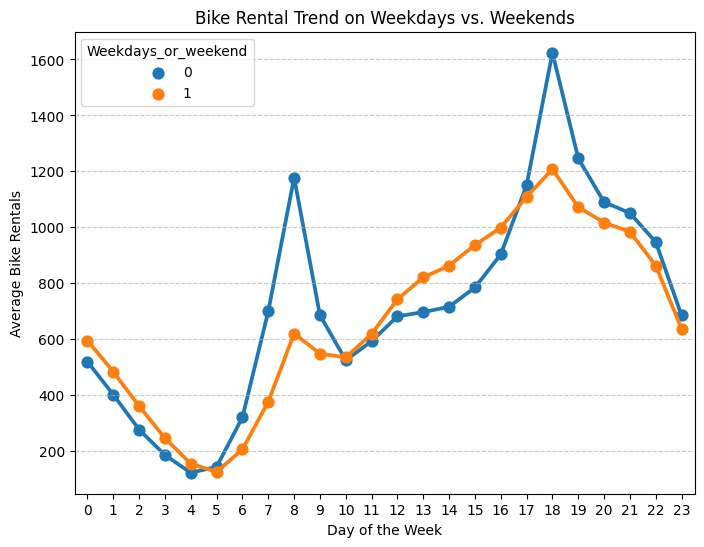

In [783]:
# Chart - 8 visualization code
#Question-8 : How does the trend in bike rentals by hour differ between weekdays and weekends?

# Create a point plot to visualize the trend
plt.figure(figsize=(8, 6))
sns.pointplot(x=rentals_by_day['Hour'],y=rentals_by_day['Rented_bike_count'],hue=rentals_by_day['Weekdays_or_weekend'])
plt.title('Bike Rental Trend on Weekdays vs. Weekends')
plt.xlabel('Day of the Week')
plt.ylabel('Average Bike Rentals')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

The point plot was chosen because it's an effective way to visualize how the trend in bike rentals varies by hour between weekdays and weekends. It allows you to see the hourly differences in bike rentals for both categories (weekdays and weekends) and compare them easily. This type of plot is particularly suitable for showing trends and variations over time, making it a suitable choice for this analysis.

##### 2. What is/are the insight(s) found from the chart?

From the point plot that visualizes the trend in bike rentals by hour between weekdays and weekends, several insights can be derived:

1. **Peak Hours on Workdays:** It's quite clear from the chart that on workdays (weekdays), there are specific times when lots of people are renting bikes. These times are in the morning when folks are heading to work or school (around 8 AM) and in the evening when they're coming back (around 5-6 PM). This means many people use bikes for their daily commute during the week.

2. **Relaxed Weekend Rides:** On weekends, things look a bit different. There's no crazy morning rush to get to work, so bike rentals stay fairly steady throughout the day. People seem to use bikes more casually on the weekends, probably for fun outings or leisurely rides.

3. **Morning Commutes Rule on Workdays:** The mornings on workdays stand out as the time when most people are using bikes to get to where they need to be. It's like a bike-powered morning commute club. On weekends, bike rentals are more evenly spread out during the day.

4. **Evenings Leasure:** Whether it's a workday or a weekend, evenings seem to be the perfect time for enjoyable bike rides. It's like the world slows down a bit, and people hop on their bikes for some relaxation and outdoor adventures.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

these insights can have a significant impact on the bike rental business, both positively and potentially negatively:

**Positive Impact:**

1. **Smart Planning:** Understanding when most people rent bikes on workdays means bike rental businesses can be ready when demand is high, making customers happier.

2. **Better Ads:** Businesses can show the right ads at the right times. They can promote fun weekend rides on Saturdays and Sundays and emphasize quick and easy commuting on weekdays.

3. **Happy Customers:** By knowing when people like to rent bikes, businesses can offer extra services like guided tours or quick rentals during busy times. This makes customers enjoy their bike rides even more.

**Negative Impact:**

1. **Over-Reliance on Workdays:** Relying too much on busy workdays might mean fewer customers on slow weekends or evenings. It's important to have a plan for those times too.

2. **Marketing Missteps** If ads during busy times don't grab people's attention, they might not rent bikes. So, it's crucial to get the ads right.

3. **Resource Imbalance:** Spending too much on staff and bikes during peak times can be expensive. If there aren't enough customers, it can hurt the business.

Knowing when people like to rent bikes helps businesses be ready when they're needed most. But businesses also need to be ready for slower times and make sure their ads work well. It's all about finding the right balance.

#### Chart - 9

<Figure size 1200x600 with 0 Axes>

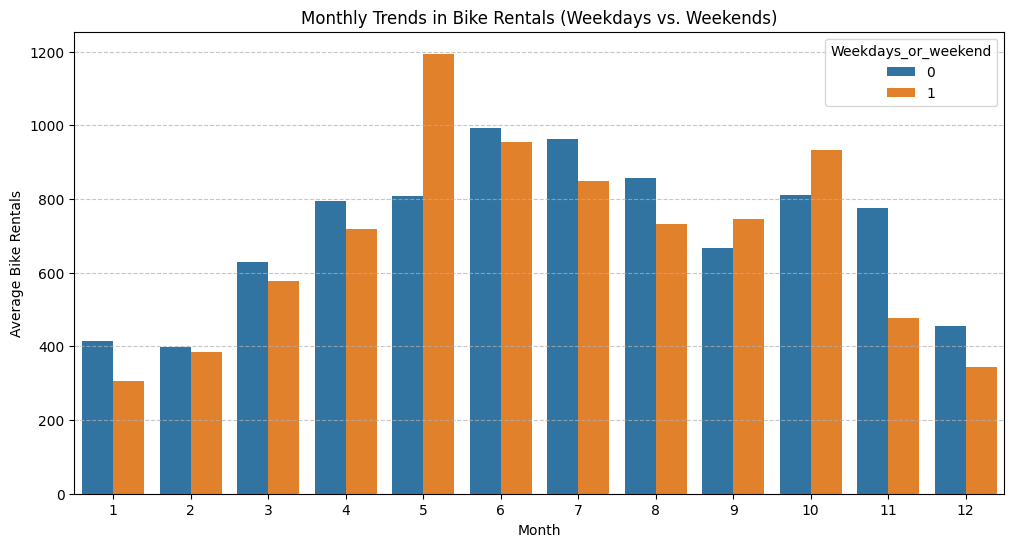

In [784]:
# Chart - 9 visualization code
#Question-8:What are the monthly trends in bike rentals for both weekdays and weekends?


# Create line plots for monthly trends
plt.figure(figsize=(12, 6))

# Bar plots for monthly trends
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_weekly_trends, x='Month', y='Rented_bike_count', hue='Weekdays_or_weekend')
plt.title('Monthly Trends in Bike Rentals (Weekdays vs. Weekends)')
plt.xlabel('Month')
plt.ylabel('Average Bike Rentals')
plt.legend(title='Weekdays_or_weekend')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### 1. Why did you pick the specific chart?

I opted for bar plots to depict the monthly bike rental patterns for weekdays and weekends. Bar plots are well-suited for comparing the average rental counts across different months while highlighting distinctions between weekdays and weekends with varying colors. This visualization aids in recognizing any trends or variations in bike rentals throughout the year, offering valuable insights for businesses to understand the impact of weekdays and weekends on their rental operations and plan accordingly to meet customer demand effectively.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals several insights:

1. **Monthly Patterns:** Bike rentals generally increase during the warmer months (June, July, August) and decrease in the colder ones (December, January). This aligns with seasonal weather changes.

2. **Weekdays vs. Weekends:** On weekdays, bike rentals tend to follow a consistent pattern with minor fluctuations. In contrast, weekends see higher rentals during summer, indicating leisurely use.

3. **Weekend Variability:** Weekends show more variability, with spikes in the summer months, suggesting increased recreational bike usage.

4. **Holiday Impact:** It's noticeable that holiday months often coincide with increased rentals, especially in the summer.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can indeed help create a positive business impact:

1. **Positive Impact:**
   - **Seasonal Planning:** Understanding the monthly rental patterns allows businesses to plan their inventory and marketing efforts accordingly. For example, they can stock more bikes during the summer months when demand is high.
   - **Holiday Promotions:** Recognizing the increase in rentals during holiday months provides an opportunity for targeted marketing and promotions to further boost rentals.

2. **Negative Growth:**
   - **Winter Challenge:** The decrease in rentals during the winter months could lead to negative growth if businesses are not prepared. It may require scaling down operations or offering incentives to maintain customer engagement during the off-season.



#### Chart - 10 - Correlation Heatmap

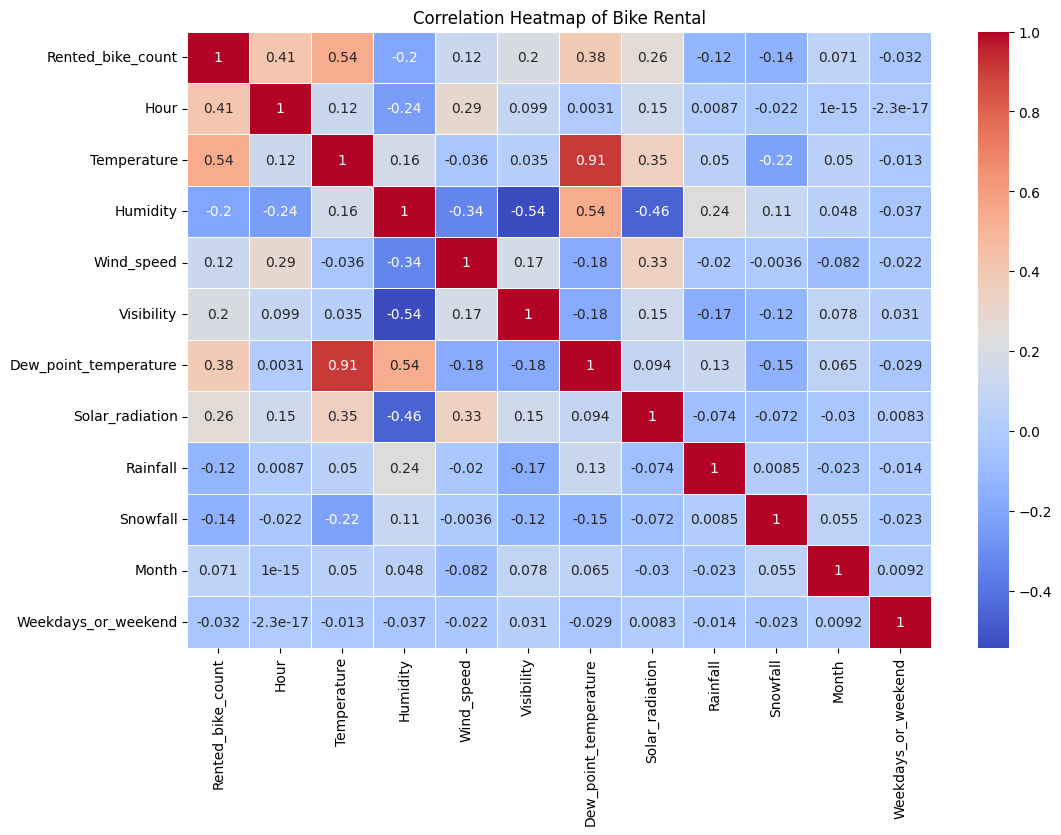

In [785]:
# Correlation Heatmap visualization code
# Is there any correlation & pattern between all quantitative values?

# Create a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corelation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Bike Rental')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap was chosen for its ability to provide a concise and visually informative representation of the correlation between all quantitative variables in the dataset. The color-coded heatmap with annotations offers a quick and clear overview of the relationships and patterns among these variables.

##### 2. What is/are the insight(s) found from the chart?

The heatmap provides several valuable insights from the correlations between quantitative variables:

1. **Rented Bike Count Relationship:** The strongest correlation with the rented bike count is observed with temperature, followed by hour and dew point temperature. This suggests that these factors have a significant impact on bike rentals.

2. **Temperature and Solar Radiation:** There is a positive correlation between temperature and solar radiation, indicating that sunny days with higher temperatures are often related.

3. **Temperature and Dew Point:** A strong positive correlation between temperature and dew point temperature suggests that these variables tend to rise and fall together, indicating a potential multicollinearity issue.

4. **Humidity and Solar Radiation:** Humidity and solar radiation show a negative correlation, implying that higher humidity levels are associated with less solar radiation or sunshine.

5. **Humidity and Visibility:** The highest negative correlation is observed between humidity and visibility, suggesting that as humidity increases, visibility tends to decrease.

It's important to note that the strong correlation between temperature and dew point temperature may indicate multicollinearity, which can be addressed using techniques like VIF (Variance Inflation Factor) during regression analysis to avoid issues of collinearity.

#### Chart - 11 - Pair Plot

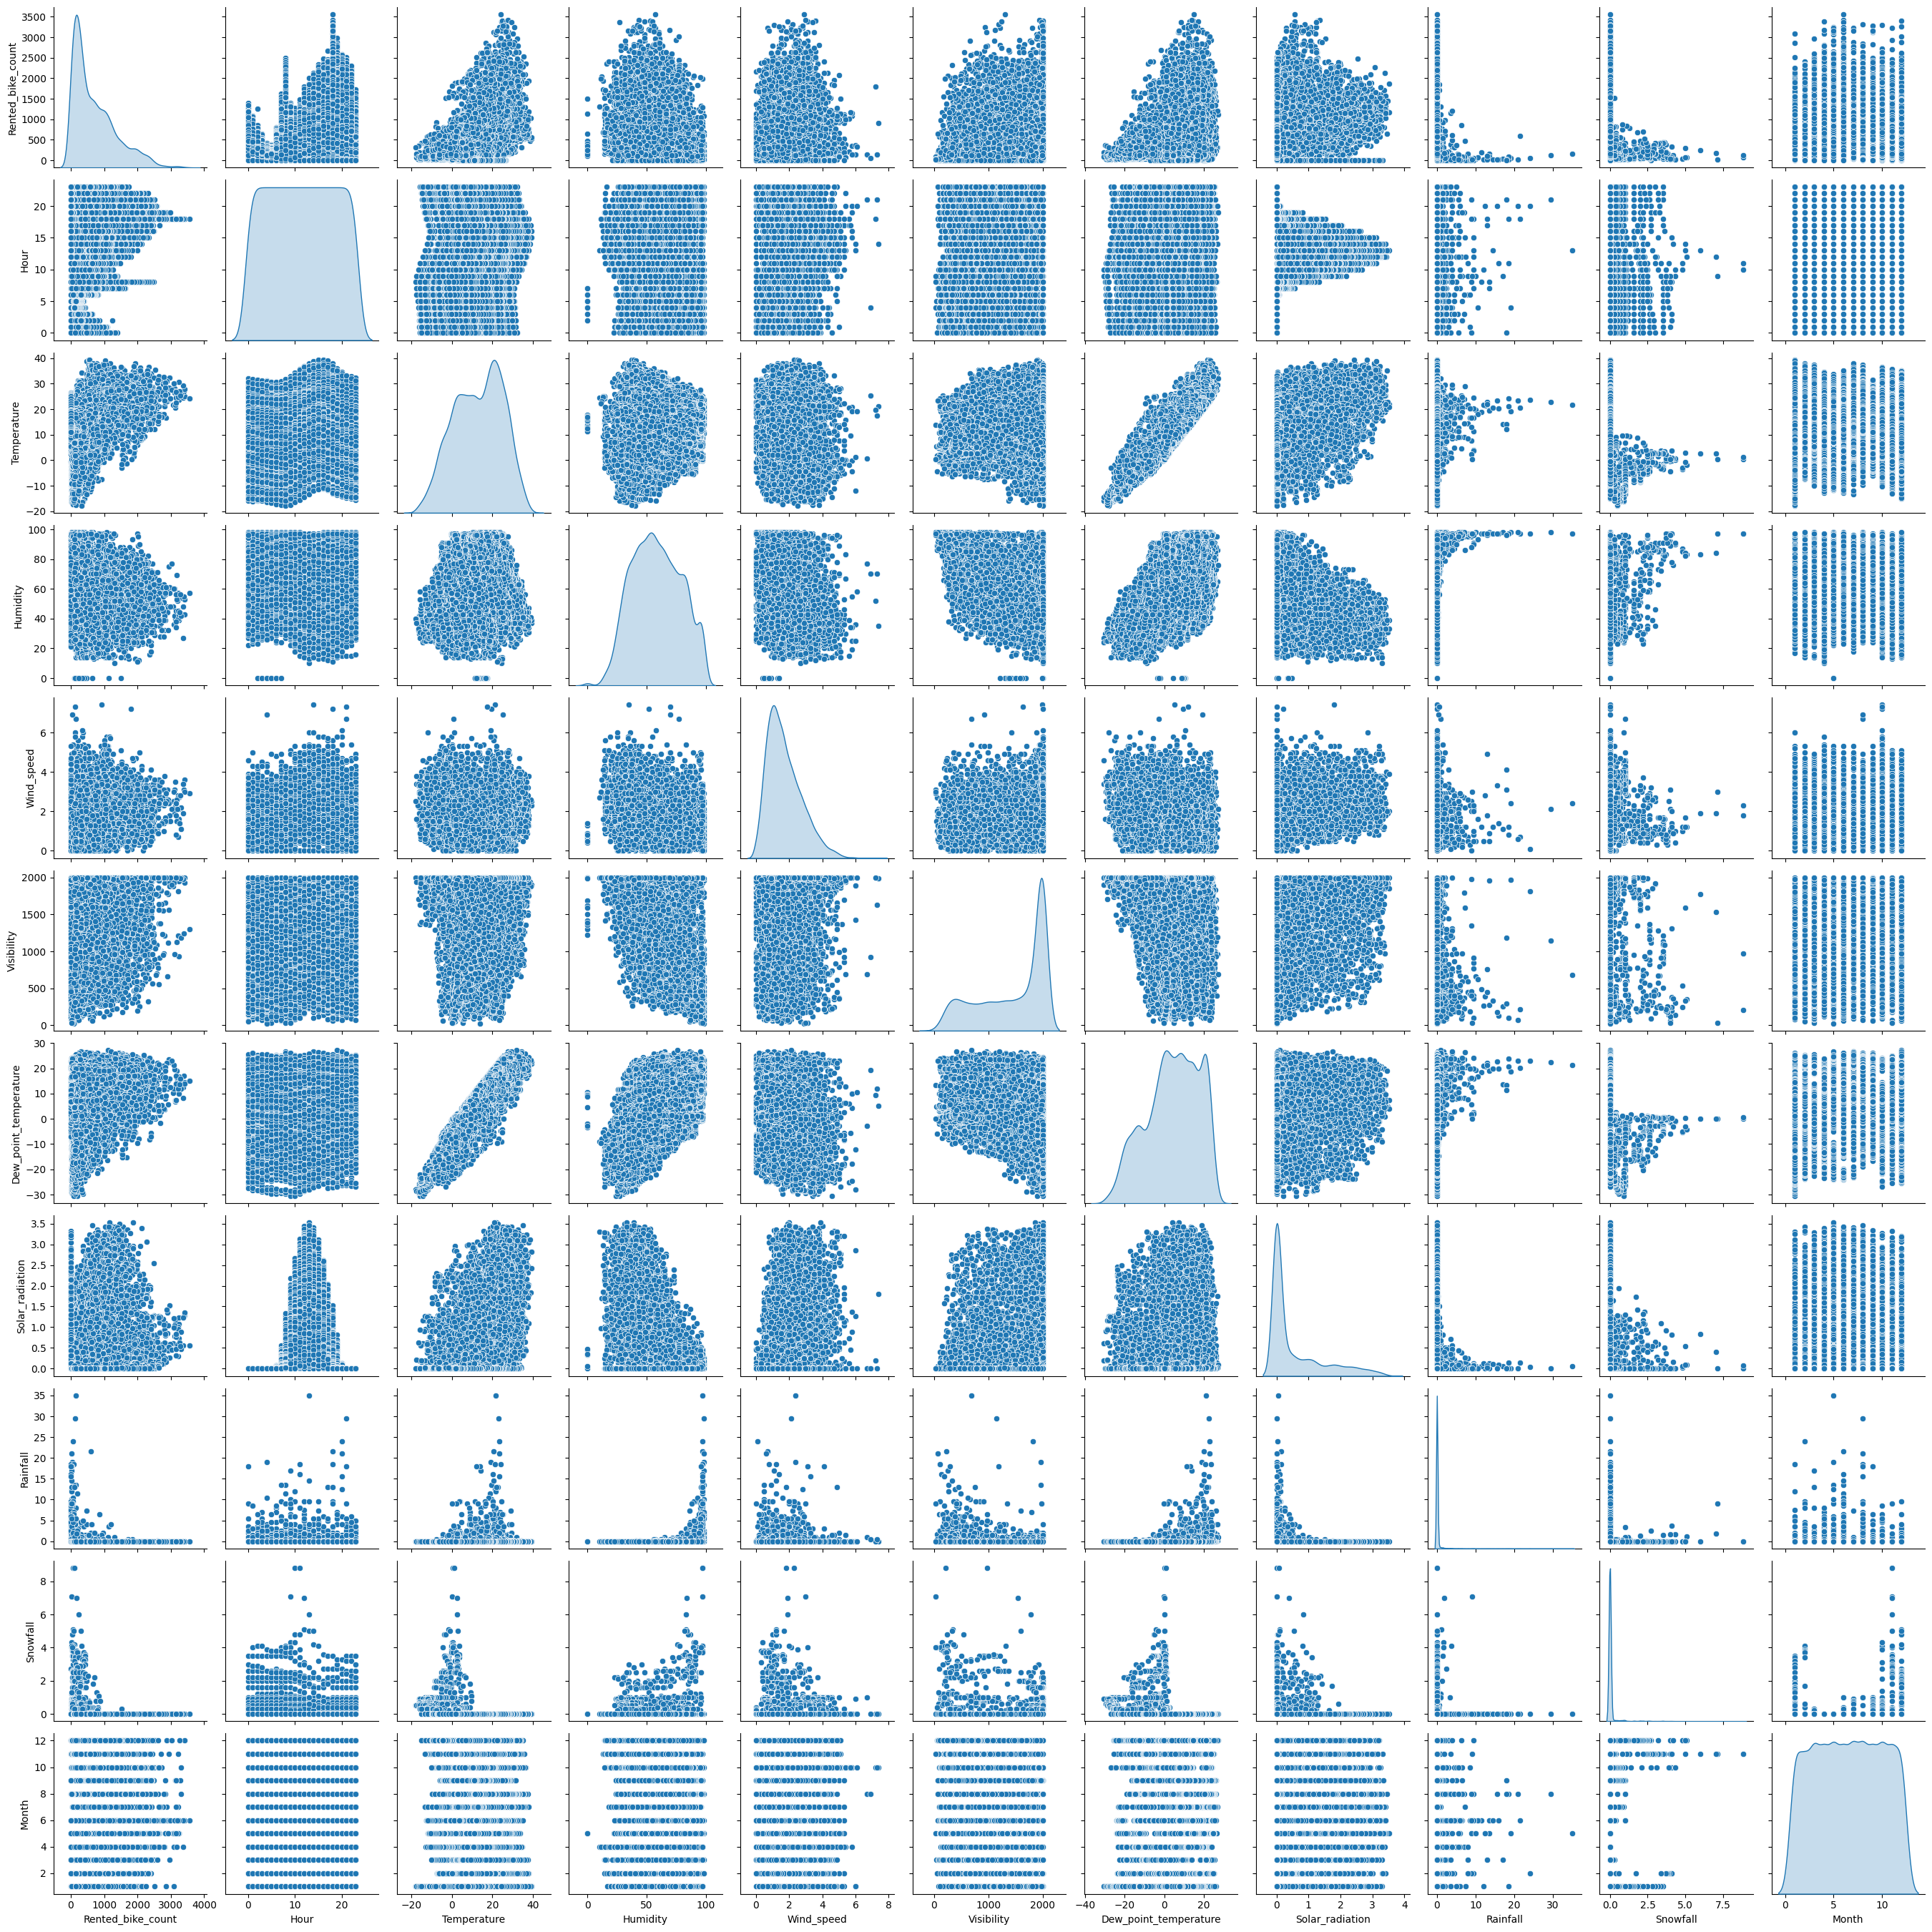

In [786]:
# Pair Plot visualization code

# Create a pair plot using seaborn
sns.pairplot(bike_df[pair_columns],diag_kind='kde')
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot was chosen because it's ideal for visualizing relationships and patterns between multiple numerical variables simultaneously. This visualization provides insights into correlations, distributions, and potential trends in the data, making it a powerful tool for exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the pair plot chart are as follows:

1. **Temperature vs. Rented Bike Count:** There is a positive correlation between temperature and rented bike count. As temperature increases, more bikes tend to be rented, indicating that people are more likely to rent bikes on warmer days.

2. **Hour vs. Rented Bike Count:** The hourly distribution of rented bike counts shows certain peak hours when bike rentals are higher. This suggests potential demand patterns throughout the day.

3. **Humidity vs. Rented Bike Count:** There doesn't appear to be a strong linear correlation between humidity and rented bike count, indicating that humidity alone may not significantly impact bike rental behavior.

4. **Rainfall vs. Rented Bike Count:** Bike rentals seem to decrease when there is rainfall. This is evident from the clusters of points with low bike rentals when rainfall is present.

5. **Snowfall vs. Rented Bike Count:** Similarly, bike rentals are significantly lower when there is snowfall. Points cluster near zero bike rentals during snowfall.

6. **Dew Point Temperature vs. Rented Bike Count:** Dew point temperature shows a positive correlation with rented bike count, similar to temperature. This suggests that both temperature and dew point temperature have a similar impact on bike rentals.

7. **Wind Speed vs. Rented Bike Count:** There doesn't seem to be a strong linear relationship between wind speed and rented bike count, indicating that wind speed alone may not be a primary factor affecting bike rentals.

8. **Solar Radiation vs. Rented Bike Count:** Higher solar radiation levels are associated with increased bike rentals. This indicates that sunny days encourage more people to rent bikes.

9. **Visibility vs. Rented Bike Count:** Visibility doesn't show a strong linear correlation with bike rentals, suggesting that visibility alone may not be a key factor influencing bike rental patterns.
10. **Month vs Rented Bike Count**:month also not slowing any kind of stong relation with bike rentals.

11. **Temperature and Dew Point:**A strong positive correlation between temperature and dew point temperature implies that these variables tend to rise and fall together, potentially indicating multicollinearity.

12. **Skewness:** Most columns exhibit right-skewed distributions, meaning data points are concentrated at lower values and tail off towards higher values. This suggests that features are following non-uniform distributions.

To gain a deeper understanding of the relationship between "Rented Bike Count" and the other numerical columns, we are going to use  regression plots to provide clear and insightful visualizations.

####Chart 12:Regression plot

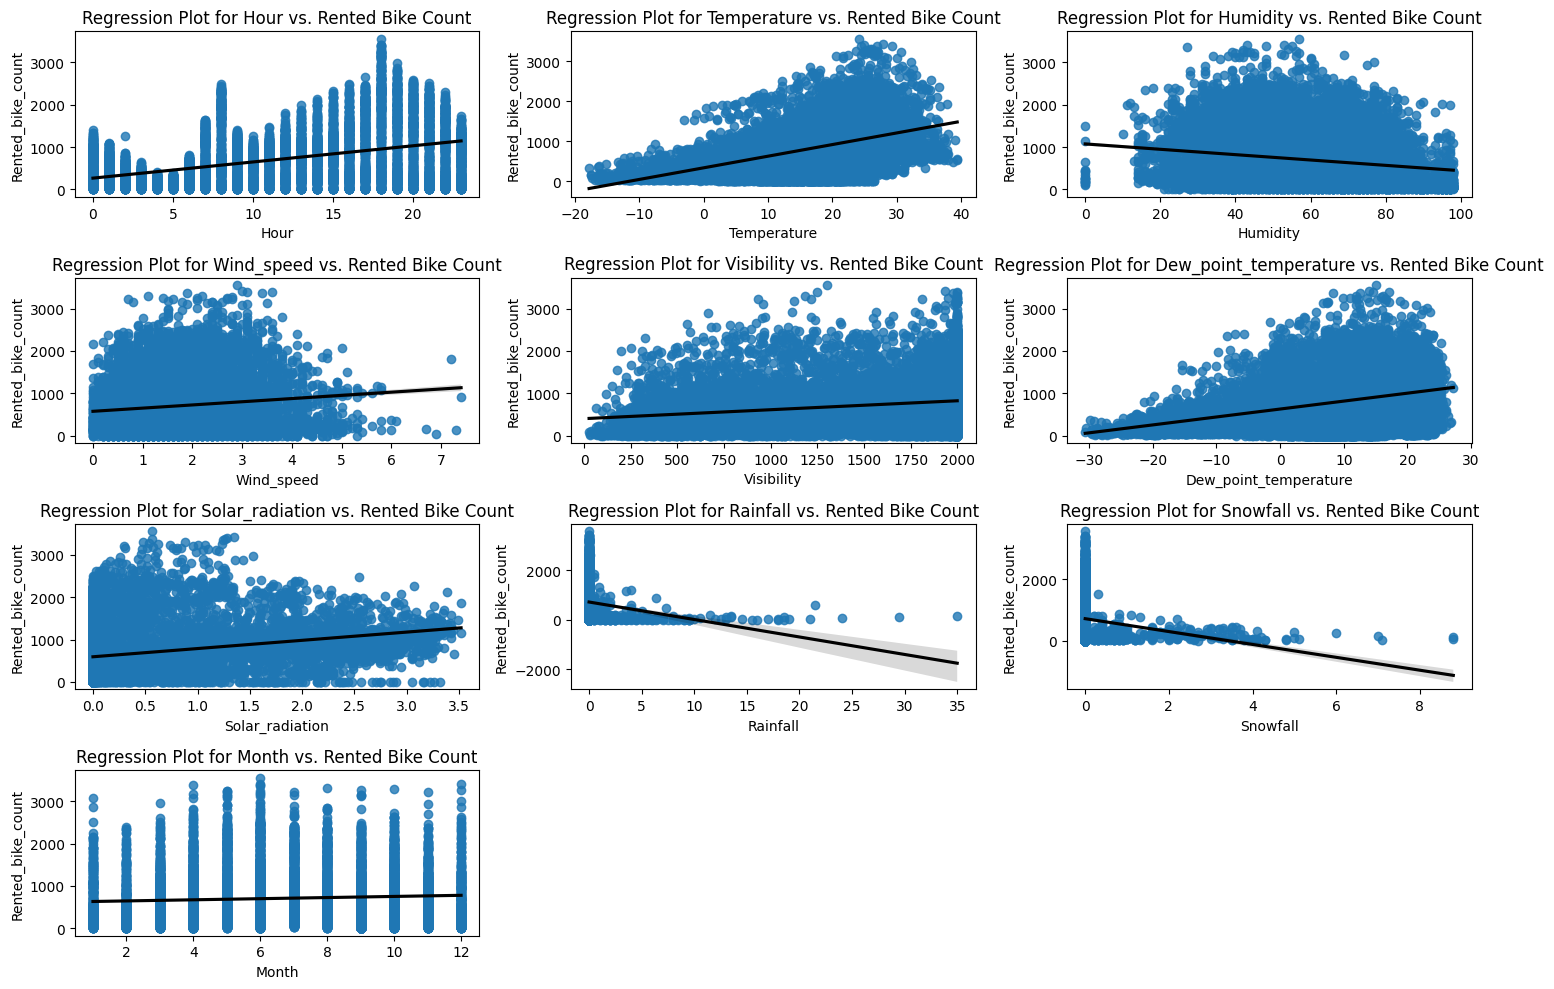

In [787]:
#Regression plot visualization code

# List of numerical columns to visualize
numerical_columns = ['Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall', 'Snowfall','Month']

# Create subplots for each numerical column
plt.figure(figsize=(15, 10))

#Create regression plot
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.regplot(data=bike_df, x=column, y='Rented_bike_count',line_kws={'color':'black'})
    plt.title(f'Regression Plot for {column} vs. Rented Bike Count')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Regression plotsis used because of powerful visualization tools for understanding the relationship between a single numerical predictor variable and a numerical target variable. They provide clear insights into how changes in the predictor variable affect the target variable. By fitting a regression line, these plots help identify trends and patterns, making them valuable for understanding the impact of individual factors on outcomes, as seen in the analysis of bike rentals.For these set of reasons regression plot is used after pair plot for clear understanding

##### 2. What is/are the insight(s) found from the chart?


The regression plots provide valuable insights into how individual numerical variables affect bike rentals ,which are given bellow:

1. **Temperature:** As temperature increases, there is a clear positive linear relationship with an increase in rented bike count. Warmer temperatures lead to more bike rentals, suggesting that people are more inclined to rent bikes on sunny and warm days.

2. **Hour:** The regression plot for hour reveals peaks in bike rentals during evening hours slow growth in morning hours. This indicates that the time of day has a significant impact on bike rental patterns, with higher rentals during peak hours.

3. **Humidity:** Humidity does not show a strong linear relationship with rented bike count, suggesting that humidity alone may not be a major factor influencing bike rental behavior.

4. **Rainfall & Snowfall:** Rainfall aswell as snowfall is negatively correlated with bike rentals. When there is rainfall or smowfall, there is a noticeable decrease in rented bike count, indicating that people are less likely to rent bikes in wet weather else their is snowfall.

5. **Dew Point Temperature :** Dew point temperature exhibits a positive linear relationship with rented bike count, similar to temperature. This reinforces that both temperature and dew point temperature play a role in bike rental patterns.

6. **Wind Speed :** Wind speed does not show a strong linear relationship with bike rentals, suggesting that it may not be a primary factor affecting rental behavior.

7. **Solar Radiation:** Solar radiation has a positive linear correlation with bike rentals. This indicates that sunny days with higher solar radiation levels encourage more bike rentals.

8. **Visibility:** Visibility does not display a strong linear correlation with rented bike count, suggesting that it may not be a dominant factor influencing bike rental trends.
9. **Month** Month does not show any relation with rented bike count .

These regression plots provide a clear understanding of how various weather-related factors and time of day impact bike rental counts. Temperature, rainfall, snowfall, dew point temperature, and solar radiation are notable factors influencing bike rental behavior, while humidity, wind speed, and visibility have less pronounced effects.

 ### Chart-13 Outlier Detection

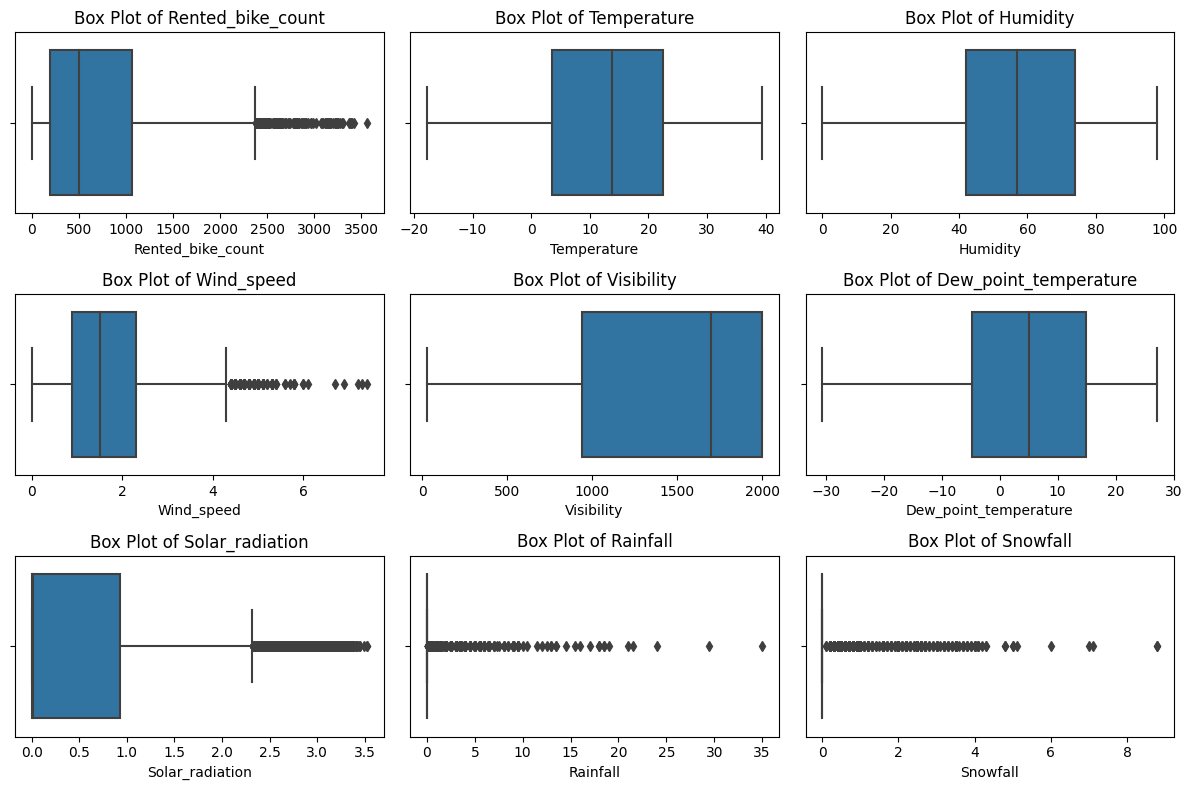

In [788]:
# Select numerical columns for box plots
numerical_columns = ['Rented_bike_count', 'Temperature',"Humidity", 'Wind_speed',
                     "Visibility","Dew_point_temperature","Solar_radiation","Rainfall","Snowfall"]
# Create subplots
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=bike_df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I selected the box plot for outlier identification due to its ability to present the distribution of data and potential outliers in a compact and visual manner. This makes it easy to spot data points that deviate significantly from the rest of the dataset. The box plot is commonly used for outlier analysis and allows for quick comparisons across multiple columns. It's a standard practice in data analysis for identifying and understanding outlier

##### 2. What is/are the insight(s) found from the chart?

The box plot visualization has provided valuable insights into potential outliers within the Seoul Bike Rental dataset:

* **Visibility**, **Dew_point_temperature**, **Temperature**, and **Humidity** features exhibit distributions without any noticeable outliers. These features seem to maintain a consistent and stable pattern without any extreme values.

* Conversely, the **Rented_bike_count**, **Wind_speed**, **Solar_radiation**, **Rainfall**, and **Snowfall** columns display data points that extend beyond the upper whisker, indicating that certain features have a higher-than-average number of bike rentals, possibly influenced by natural phenomena.

It's worth noting that the presence of outliers doesn't necessarily demand their removal. Instead, various techniques such as scaling or transforming data can be employed to mitigate their impact on subsequent analysis. However, further investigation is warranted to fully understand the context of these outliers and their potential implications on the overall analysis. Careful consideration and domain knowledge will be essential in determining how to handle these unusual data points effectively.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement-1: Average bike rental in summers is higher than other seasons

statement-2: There is a significant posstive co-relation between Temperture & Deu point temperature

stamenet-3: Average Bike rental at 17 to 19 Hours is significantly higher than  average bike rentals in other hours.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): μSA ≤ μOA (The average bike rentals in Summer seasons are less than equals average bike rentals in other seasons)

Alternative Hypothesis (Ha): μSA > μOA (The average bike rentals in Summer seasons are grater average bike rentals in other seasons)

#### 2. Perform an appropriate statistical test.

In [789]:
# Perform Statistical Test to obtain P-Value

# Filter the dataset for Summer seasons
summer_data = bike_df[bike_df['Seasons'].isin(['Summer'])]['Rented_bike_count']

# Filter the dataset for other seasons (excluding Summer)
other_seasons_data = bike_df[~bike_df['Seasons'].isin(['Summer'])]['Rented_bike_count']

# Perform a one-tailed independent t-test
t_statistic, p_value = stats.ttest_ind(summer_data, other_seasons_data, alternative='greater')

print("p-value",p_value)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis")
    print("The average bike rentals in Summer seasons are significantly higher than in other seasons.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in average bike rentals between Summer seasons and other seasons.")


p-value 1.2486181146170258e-177
Reject the null hypothesis
The average bike rentals in Summer seasons are significantly higher than in other seasons.


##### Which statistical test have you done to obtain P-Value?

The statistical  performed to obtain the p-value in this case is an independent two-sample t-test.The specific form of the t-test used here is a one-tailed t-test with the alternative hypothesis that the average bike rentals in Summer seasons are greater than in other seasons.

##### Why did you choose the specific statistical test?


I chose the t-test because it's the appropriate statistical method for comparing the means of two groups, precisely what we needed for this hypothesis test. Our goal was to assess if there's a significant difference in average bike rentals between the summer season (one group) and the other seasons (another group). The t-test helps us determine if this difference is likely due to random chance or if it's statistically significant.

Upon conducting the t-test with a significance level (alpha) set at 0.05, we found that the p-value is less than the alpha level. This indicates that we can reject the null hypothesis. In simpler terms, we have statistical evidence to conclude that the average bike rentals are higher during the summer season compared to other seasons.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no correlation between the Temperature & Due point temperature. (ρ = 0)

Alternative Hypothesis (Ha): There is a significant positive correlation between Temperature & Due point temperature . (ρ > 0)

#### 2. Perform an appropriate statistical test.

In [790]:
# Perform Statistical Test to obtain P-Value


# Calculate the Pearson correlation coefficient and its p-value
corr_coeff, p_value = stats.pearsonr(bike_df['Temperature'], bike_df['Dew_point_temperature'])

# Print the results
print("Pearson Correlation Coefficient:", corr_coeff)
print("P-value:", p_value)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant positive correlation between Temperature & Due point temperature")
else:
    print("Fail to reject the null hypothesis")
    print("There is no correlation between the Temperature & Due point temperature")




Pearson Correlation Coefficient: 0.9127982187579918
P-value: 0.0
Reject the null hypothesis
There is a significant positive correlation between Temperature & Due point temperature


##### Which statistical test have you done to obtain P-Value?

To obtain the p-value for testing the correlation between Temperature and Dew Point Temperature, I used the Pearson correlation coefficient test.

##### Why did you choose the specific statistical test?

Absolutely, you've provided an accurate explanation. The Pearson correlation coefficient test was chosen because it's a widely recognized method for evaluating the linear relationship between two continuous variables. In our case, it helped us assess whether there is a meaningful positive correlation between Temperature and Dew Point Temperature. This test not only quantifies the strength and direction of the linear relationship but also provides a p-value to determine its statistical significance. As a result, it was the appropriate choice for conducting this hypothesis test.

Consequently, we can confidently conclude, at the 0.05 significance level, that we reject the null hypothesis and observe a clear positive correlation between temperature and dew point temperature. This means that as temperature increases, dew point temperature tends to increase as well.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): μEH ≤ μOH (The average bike rentals in evening hours(17-19) are less than equals to other hour average bike rentals)

Alternative Hypothesis (Ha): μEH > μOH (The average bike rentals in evening hours(17-19) is higher than average bike rentals in other hours)

#### 2. Perform an appropriate statistical test.

In [791]:
# Perform Statistical Test to obtain P-Value

# Filter the dataset for evening hours (17-19 o'clock) & calculate mean
bike_rentals_evening = bike_df[(bike_df['Hour'] >= 17) & (bike_df['Hour'] <= 19)]['Rented_bike_count']

# Filter the dataset for hours excluding (17-19) o'clock & calculate mean
bike_rentals_other_hours = bike_df[~bike_df['Hour'].isin([17, 18, 19])]['Rented_bike_count']

# Perform a t-test
t_statistic, p_value = stats.ttest_ind(bike_rentals_evening ,
                                      bike_rentals_other_hours  ,
                                       equal_var=True)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis")
    print("The average bike rentals in evening hours (17-19) are significantly higher than in other hours.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in average bike rentals between evening hours (17-19) and other hours.")

T-statistic: 33.44478290014794
P-value: 6.567662343115041e-231
Reject the null hypothesis
The average bike rentals in evening hours (17-19) are significantly higher than in other hours.


##### Which statistical test have you done to obtain P-Value?

The statistical two-sample t-test is performed to obtain p-valle.The specific form of the t-test used here is a one-tailed t-test with the alternative hypothesis that the average bike rentals in evening hours is higher than other hours.

##### Why did you choose the specific statistical test?

I chose the independent two-sample t-test because it's suitable for comparing the means of two independent groups, which is precisely what we needed to do in this hypothesis test. We wanted to compare the average bike rentals in the evening hours (17-19) group to the average bike rentals in the other hours group to see if there's a statistically significant difference. The t-test helps determine if this difference is likely to be due to chance or if it's statistically meaningful.

The obtained result with a significance level of 0.05 shows that the p-value is significantly smaller than it. Therefore, we conclude that evening hours have higher bike rentals compared to other hours by rejecting the null hypothesis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [792]:
# Handling Missing Values & Missing Value Imputation

bike_df.isnull().sum()

Rented_bike_count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_day          0
Month                    0
Weekdays_or_weekend      0
dtype: int64

Their is no missing value present in any column.

#### What all missing value imputation techniques have you used and why did you use those techniques?

Since there are no missing values in the dataset, there is no need to use techniques like Simple Imputer to fill in missing data.

### 2. Handling Outliers

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [793]:
# Manipulate Features to minimize feature correlation and create new features

bike_df.sample(1)

Rented_bike_count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
1410                157    18         -4.9        35         3.7        2000   

      Dew_point_temperature  Solar_radiation  Rainfall  Snowfall Seasons  \
1410                  -18.0             0.04       0.0       0.0  Winter   

         Holiday Functioning_day  Month  Weekdays_or_weekend  
1410  No Holiday             Yes      1                    1

In [794]:
# Drop dew point temperature.
bike_df.drop('Dew_point_temperature',inplace=True,axis=1)



The heatmap reveals a strong correlation between "Dew_point_temperature" and "Temperature," indicating collinearity. Collinearity is problematic for parametric algorithms like linear regression. To mitigate this issue, It is  decided to drop "Dew_point_temperature" from our analysis. This choice is supported by the observation that "Dew_point_temperature" has a lower correlation with the "bike_rental_count" column compared to "Temperature."

In [795]:
bike_df.columns

Index(['Rented_bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning_day', 'Month', 'Weekdays_or_weekend'],
      dtype='object')

In [796]:
bike_df.shape

(8760, 14)

#### 2. Feature Selection

In [797]:

#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)




In [798]:
#calculate vif excluding rented bike count
Calculate_vif(bike_df[[i for i in bike_df.describe().columns if i not in ['Rented_bike_count']]])

variables       VIF
0                 Hour  3.961874
1          Temperature  3.236809
2             Humidity  6.114153
3           Wind_speed  4.616621
4           Visibility  5.404128
5      Solar_radiation  2.272068
6             Rainfall  1.081252
7             Snowfall  1.125304
8                Month  4.580307
9  Weekdays_or_weekend  1.399708

Both "Visibility" and "Humidity" have VIF (Variance Inflation Factor) values greater than 5. This indicates that they exhibit multicollinearity with other variables in the dataset. In the presence of multicollinearity, it's advisable to remove one of the correlated variables to improve the stability of regression models. Therefore, we will drop one of these variables to address the issue of multicollinearity.

In [799]:
bike_df.corr()

Rented_bike_count          Hour  Temperature  Humidity  \
Rented_bike_count             1.000000  4.102573e-01     0.538558 -0.199780   
Hour                          0.410257  1.000000e+00     0.124114 -0.241644   
Temperature                   0.538558  1.241145e-01     1.000000  0.159371   
Humidity                     -0.199780 -2.416438e-01     0.159371  1.000000   
Wind_speed                    0.121108  2.851967e-01    -0.036252 -0.336683   
Visibility                    0.199280  9.875348e-02     0.034794 -0.543090   
Solar_radiation               0.261837  1.451309e-01     0.353505 -0.461919   
Rainfall                     -0.123074  8.714642e-03     0.050282  0.236397   
Snowfall                     -0.141804 -2.151645e-02    -0.218405  0.108183   
Month                         0.070861  1.036729e-15     0.049683  0.047798   
Weekdays_or_weekend          -0.032259 -2.300554e-17    -0.012972 -0.036750   

                     Wind_speed  Visibility  Solar_radiation  Rainfall  \
Rented_bike_count      0.121108    0.199280         0.261837 -0.123074   
Hour                   0.285197    0.098753         0.145131  0.008715   
Temperature           -0.036252    0.034794         0.353505  0.050282   
Humidity              -0.336683   -0.543090        -0.461919  0.236397   
Wind_speed             1.000000    0.171507         0.332274 -0.019674   
Visibility             0.171507    1.000000         0.149738 -0.167629   
Solar_radiation        0.332274    0.149738         1.000000 -0.074290   
Rainfall              -0.019674   -0.167629        -0.074290  1.000000   
Snowfall              -0.003554   -0.121695        -0.072301  0.008500   
Month                 -0.082069    0.077888        -0.030412 -0.022794   
Weekdays_or_weekend   -0.022391    0.030650         0.008271 -0.014280   

                     Snowfall         Month  Weekdays_or_weekend  
Rented_bike_count   -0.141804  7.086107e-02        -3.225936e-02  
Hour                -0.021516  1.036729e-15        -2.300554e-17  
Temperature         -0.218405  4.968327e-02        -1.297241e-02  
Humidity             0.108183  4.779778e-02        -3.674982e-02  
Wind_speed          -0.003554 -8.206909e-02        -2.239107e-02  
Visibility          -0.121695  7.788783e-02         3.064954e-02  
Solar_radiation     -0.072301 -3.041240e-02         8.271095e-03  
Rainfall             0.008500 -2.279368e-02        -1.427960e-02  
Snowfall             1.000000  5.475846e-02        -2.255705e-02  
Month                0.054758  1.000000e+00         9.174254e-03  
Weekdays_or_weekend -0.022557  9.174254e-03         1.000000e+00

We can see that both "Visibility" and "Humidity" have a similar level of correlation with rented bikes, and since "Humidity" has a higher VIF value, it will be dropped to address the issue of multicollinearity.

In [800]:
#calculate vif excluding rented bike count & Humidity
Calculate_vif(bike_df[[i for i in bike_df.describe().columns if i not in ['Rented_bike_count','Humidity']]])

variables       VIF
0                 Hour  3.931193
1          Temperature  2.543847
2           Wind_speed  4.301342
3           Visibility  5.330632
4      Solar_radiation  1.894468
5             Rainfall  1.045135
6             Snowfall  1.081123
7                Month  3.741610
8  Weekdays_or_weekend  1.375146

Visibility has a higher VIF value, indicating multicollinearity, so it also needs to be dropped from the analysis to address this issue.

In [801]:
#calculate vif excluding rented bike count , Humidity & Visiblity
Calculate_vif(bike_df[[i for i in bike_df.describe().columns if i not in ['Rented_bike_count','Humidity','Visibility']]])

variables       VIF
0                 Hour  3.755736
1          Temperature  2.492225
2           Wind_speed  3.748534
3      Solar_radiation  1.893823
4             Rainfall  1.030569
5             Snowfall  1.077566
6                Month  3.049391
7  Weekdays_or_weekend  1.350943

Each and every variable has a VIF value below 5, so there is no need to discard any feature from them. Hence, multicollinearity is effectively controlled.

In [802]:
#Drop Humidity & Visibility
bike_df.drop(["Humidity","Visibility"],axis=1,inplace=True)

In [803]:
bike_df.head(1)

Rented_bike_count  Hour  Temperature  Wind_speed  Solar_radiation  \
0                254     0         -5.2         2.2              0.0   

   Rainfall  Snowfall Seasons     Holiday Functioning_day  Month  \
0       0.0       0.0  Winter  No Holiday             Yes      1   

   Weekdays_or_weekend  
0                    0

In [804]:
#Split Dataset to X&y column
X=bike_df.iloc[:,1:]
y=bike_df.iloc[:,0].values

In [805]:
#Independent variable
X.head()

Hour  Temperature  Wind_speed  Solar_radiation  Rainfall  Snowfall Seasons  \
0     0         -5.2         2.2              0.0       0.0       0.0  Winter   
1     1         -5.5         0.8              0.0       0.0       0.0  Winter   
2     2         -6.0         1.0              0.0       0.0       0.0  Winter   
3     3         -6.2         0.9              0.0       0.0       0.0  Winter   
4     4         -6.0         2.3              0.0       0.0       0.0  Winter   

      Holiday Functioning_day  Month  Weekdays_or_weekend  
0  No Holiday             Yes      1                    0  
1  No Holiday             Yes      1                    0  
2  No Holiday             Yes      1                    0  
3  No Holiday             Yes      1                    0  
4  No Holiday             Yes      1                    0

In [806]:
#Dependent variable
y

array([254, 204, 173, ..., 694, 712, 584])

### 3. Categorical Encoding

In [807]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hour                 8760 non-null   int64  
 1   Temperature          8760 non-null   float64
 2   Wind_speed           8760 non-null   float64
 3   Solar_radiation      8760 non-null   float64
 4   Rainfall             8760 non-null   float64
 5   Snowfall             8760 non-null   float64
 6   Seasons              8760 non-null   object 
 7   Holiday              8760 non-null   object 
 8   Functioning_day      8760 non-null   object 
 9   Month                8760 non-null   int64  
 10  Weekdays_or_weekend  8760 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 752.9+ KB


In [808]:
X.shape

(8760, 11)

Season,Holiday,Functioning day are 3 categorical columns & need to be converted to numerical columns

In [809]:
# Encode your categorical columns with OneHotencoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer=ColumnTransformer(transformers=[("onehot",OneHotEncoder(sparse=False,drop="first"),[6,7,8])],
                                                                              remainder="passthrough")

X=transformer.fit_transform(X)

In [810]:
X.shape

(8760, 13)

In [811]:
print(pd.DataFrame(X))

       0    1    2    3    4     5    6    7    8    9    10    11   12
0     0.0  0.0  1.0  1.0  1.0   0.0 -5.2  2.2  0.0  0.0  0.0   1.0  0.0
1     0.0  0.0  1.0  1.0  1.0   1.0 -5.5  0.8  0.0  0.0  0.0   1.0  0.0
2     0.0  0.0  1.0  1.0  1.0   2.0 -6.0  1.0  0.0  0.0  0.0   1.0  0.0
3     0.0  0.0  1.0  1.0  1.0   3.0 -6.2  0.9  0.0  0.0  0.0   1.0  0.0
4     0.0  0.0  1.0  1.0  1.0   4.0 -6.0  2.3  0.0  0.0  0.0   1.0  0.0
...   ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...   ...  ...
8755  0.0  0.0  0.0  1.0  1.0  19.0  4.2  2.6  0.0  0.0  0.0  11.0  0.0
8756  0.0  0.0  0.0  1.0  1.0  20.0  3.4  2.3  0.0  0.0  0.0  11.0  0.0
8757  0.0  0.0  0.0  1.0  1.0  21.0  2.6  0.3  0.0  0.0  0.0  11.0  0.0
8758  0.0  0.0  0.0  1.0  1.0  22.0  2.1  1.0  0.0  0.0  0.0  11.0  0.0
8759  0.0  0.0  0.0  1.0  1.0  23.0  1.9  1.3  0.0  0.0  0.0  11.0  0.0

[8760 rows x 13 columns]


#### What all categorical encoding techniques have you used & why did you use those techniques?

i used OneHot encoding techniques using Column transformer to convert certain categorical variables into a numerical format, making them suitable for machine learning models. Here's how we encoded these variables:

1. **Holiday and Functioning_day Encoding:**
   - I applied one-hot encoding to the 'Holiday' and 'Functioning_day' columns. This technique transforms binary categorical variables into a set of binary columns, where each column represents the presence or absence of a category.
   - **Reason:** I used one-hot encoding to ensure that these binary variables are treated correctly by our machine learning models, preserving their distinctness without introducing ordinal relationships.

2. **Seasons Encoding:**
   - For the 'Seasons' column, which contains categorical variables with more than two categories ('Summer,' 'Winter,' 'Autumn,' 'Spring'), I also applied one-hot encoding.
   - **Reason:** One-hot encoding allows us to represent 'Seasons' as a set of binary columns, with each column corresponding to one season. This approach is effective in handling categorical variables with multiple categories without imposing any hierarchy among them.

By using these encoding techniques, I made sure that  model could work with categorical data, helping us leverage the information contained within these variables for accurate predictions and insights in our project.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

Based on the information provided about the dataset, there doesn't seem to be any textual data present in the dataset. The dataset primarily contains numerical and categorical features related to bike rental hour,season & other relevant factors. Textual data preprocessing is typically required when dealing with natural language processing (NLP) tasks or text-based data, which is not the case in this dataset.

### 8. Data Splitting

In [812]:
# Split your data to train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(7008, 13)
(1752, 13)
(7008,)
(1752,)


In [813]:
#print x-train
print(pd.DataFrame(X_train).head(10))

    0    1    2    3    4     5     6    7     8    9    10    11   12
0  0.0  0.0  1.0  1.0  1.0   4.0  -6.4  0.8  0.00  0.0  0.0   1.0  1.0
1  0.0  0.0  1.0  1.0  1.0  14.0  -4.7  2.9  1.12  0.0  0.0  12.0  0.0
2  0.0  0.0  0.0  1.0  1.0   5.0  16.3  0.5  0.00  0.0  0.0   9.0  1.0
3  0.0  1.0  0.0  1.0  1.0  18.0  35.4  1.0  0.34  0.0  0.0   8.0  0.0
4  0.0  1.0  0.0  1.0  1.0   0.0  29.2  1.1  0.00  0.0  0.0   7.0  0.0
5  0.0  1.0  0.0  1.0  1.0  22.0  28.0  1.5  0.00  0.0  0.0   7.0  0.0
6  0.0  0.0  1.0  1.0  1.0   5.0  -1.8  0.5  0.00  0.0  0.0   2.0  0.0
7  0.0  0.0  1.0  1.0  1.0   8.0   1.2  0.6  0.00  0.0  0.0   1.0  0.0
8  0.0  0.0  1.0  1.0  1.0  12.0  -4.9  1.3  0.60  0.0  0.0  12.0  0.0
9  1.0  0.0  0.0  0.0  1.0   1.0  15.9  1.1  0.00  0.0  0.0   5.0  0.0


In [814]:
y_train

array([ 47, 240, 165, ...,  68,   0, 239])

##### What data splitting ratio have you used and why?

The test_size parameter in the train_test_split function controls the proportion of the data that should be allocated to the testing set when splitting the dataset into training and testing sets. In the above code, test_size=0.2 is used, which means that 20% of the data will be allocated to the testing set, and the remaining 80% will be used for training.The commonly used splitting ratios are 80:20 (test_size=0.2) and 70:30 (test_size=0.3). These ratios strike a good balance between having enough data for training and obtaining a reliable evaluation on the testing set.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [815]:
# Transform Your data
from sklearn.preprocessing import PowerTransformer
pt_x=PowerTransformer()
pt_y=PowerTransformer()

#Transform x set
X_train[:,5:12]=pt_x.fit_transform(X_train[:,5:12])
X_test[:,5:12]=pt_x.transform(X_test[:,5:12])

#Transform y set
y_train=pt_y.fit_transform(y_train.reshape(-1, 1))
y_test=pt_y.transform(y_test.reshape(-1, 1))



In [816]:
#x-train after scaling
print(pd.DataFrame(X_train).head(10))

    0    1    2    3    4         5         6         7         8         9   \
0  0.0  0.0  1.0  1.0  1.0 -1.070938 -1.648470 -0.935670 -0.855704 -0.247336   
1  0.0  0.0  1.0  1.0  1.0  0.416068 -1.498623  1.133692  1.212579 -0.247336   
2  0.0  0.0  0.0  1.0  1.0 -0.899821  0.282172 -1.422852 -0.855704 -0.247336   
3  0.0  1.0  0.0  1.0  1.0  0.927173  1.863813 -0.654000  0.312736 -0.247336   
4  0.0  1.0  0.0  1.0  1.0 -1.895003  1.351870 -0.523531 -0.855704 -0.247336   
5  0.0  1.0  0.0  1.0  1.0  1.410922  1.252644 -0.057120 -0.855704 -0.247336   
6  0.0  0.0  1.0  1.0  1.0 -0.899821 -1.244393 -1.422852 -0.855704 -0.247336   
7  0.0  0.0  1.0  1.0  1.0 -0.425276 -0.985333 -1.250433 -0.855704 -0.247336   
8  0.0  0.0  1.0  1.0  1.0  0.147459 -1.516227 -0.280208  0.757364 -0.247336   
9  1.0  0.0  0.0  0.0  1.0 -1.654000  0.248875 -0.523531 -0.855704 -0.247336   

         10        11   12  
0 -0.224053 -1.736485  1.0  
1 -0.224053  1.498639  0.0  
2 -0.224053  0.726933  1.0  
3 -

In [831]:
#y-train after scaling
y_train

array([[-1.42711691],
       [-0.58579555],
       [-0.82476487],
       ...,
       [-1.27736232],
       [-2.24273761],
       [-0.58863822]])

### 6. Data Scaling

Scaling the data is unnecessary because the data has already been transformed using the Power Transformer, which includes an inbuilt feature for data standardization.

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

In [818]:
# Handling Outliers & Outlier treatments

### 7. Dimesionality Reduction

Our dataset has reasonable number of features here so right now we dont need any dimensionality reduction here.

### 9. Handling Imbalanced Dataset

Handling imbalanced datasets is not a primary concern in regression models, as they are designed for predicting continuous numeric values. In our case, we've already addressed outliers & transformed data, which helps ensure that our dataset is not skewed or imbalanced. Therefore, there's no need for additional operations to handle dataset imbalance, as the outlier treatment  & transformation has already contributed to dataset balance and integrity.

## ***7. ML Model Implementation***

### ML Model - 1

In [821]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [822]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [823]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [824]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [825]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [826]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [827]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [828]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [829]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [830]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***